In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)
df_mail = pd.read_csv('data/eptica_clean.csv', index_col="Date", parse_dates = True)

In [14]:
df_mail.columns

Index(['Date', 'Entite', 'instance', 'Nb_recus'], dtype='object')

In [17]:
df_tel.columns

Index(['Entite', 'Famille', 'Nombre_entrants_corrige'], dtype='object')

In [13]:
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23783 entries, 0 to 23782
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_appel               23783 non-null  object 
 1   Entite                   23783 non-null  object 
 2   Famille                  23783 non-null  object 
 3   Nombre_entrants_corrige  23783 non-null  float64
dtypes: float64(1), object(3)
memory usage: 743.3+ KB


In [7]:
df_tel.Famille.unique()

array(['F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F1'], dtype=object)

In [16]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()



<AxesSubplot: xlabel='date_appel'>

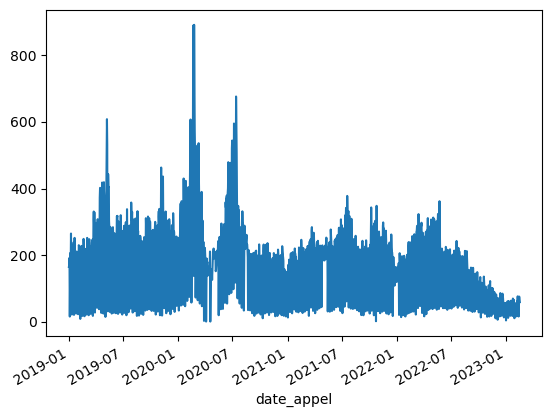

In [35]:
fig, ax = plt.subplots( )

df = df_tel[(df_tel["Entite"] == 'Entite 1') & (df_tel["Famille"] == 'F2')]

df['Nombre_entrants_corrige'].plot(ax=ax)


<AxesSubplot: xlabel='date_appel'>

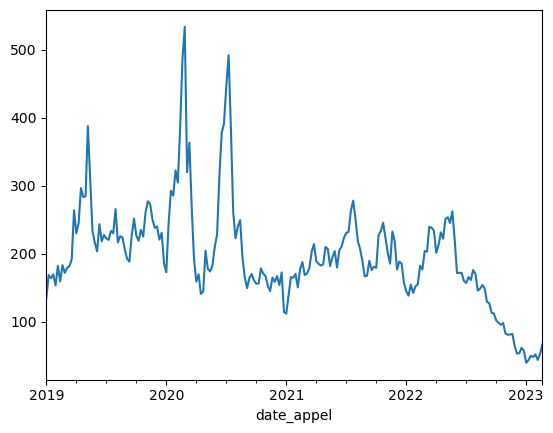

In [37]:
fig, ax = plt.subplots( )

df = df_tel[(df_tel["Entite"] == 'Entite 1') & (df_tel["Famille"] == 'F2')]

df['Nombre_entrants_corrige'].resample('W').mean().plot(ax=ax)


In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [25]:
df_tel

Entite Famille  Nombre_entrants_corrige
date_appel                                           
2019-01-02  Entite 1      F2               165.000000
2019-01-02  Entite 1      F3                54.000000
2019-01-02  Entite 1      F4                 1.000000
2019-01-02  Entite 1      F5                99.000000
2019-01-02  Entite 1      F6              1487.000000
...              ...     ...                      ...
2023-02-15  Entite 5      F2               708.329712
2023-02-15  Entite 5      F3               738.935876
2023-02-15  Entite 5      F5               463.642180
2023-02-15  Entite 5      F6               694.321440
2023-02-15  Entite 5      F7              3248.480370

[23783 rows x 3 columns]

# Infos

Confinements en France:
- 17 mars au 11 mai 2020
- 30 octobre au 15 décembre 2020
- 3 avril au 3 mai 2021

JOurs fériés en France: Holidays.


In [81]:
def add_confinement(ax):
    # premier confinement
    start_1= pd.to_datetime('2020-03-17')
    end_1 = pd.to_datetime('2020-05-11')
    ax.axvspan(start_1, end_1, alpha=0.2, color='red')

    # deuxième confinement
    start_2= pd.to_datetime('2020-10-30')
    end_2 = pd.to_datetime('2020-12-15')
    ax.axvspan(start_2, end_2, alpha=0.2, color='red')

    # troisième confinement
    start_3= pd.to_datetime('2021-04-03')
    end_3 = pd.to_datetime('2021-05-03')
    ax.axvspan(start_3, end_3, alpha=0.2, color='red')


# Telephonie

## Series Visualisation

### Daily

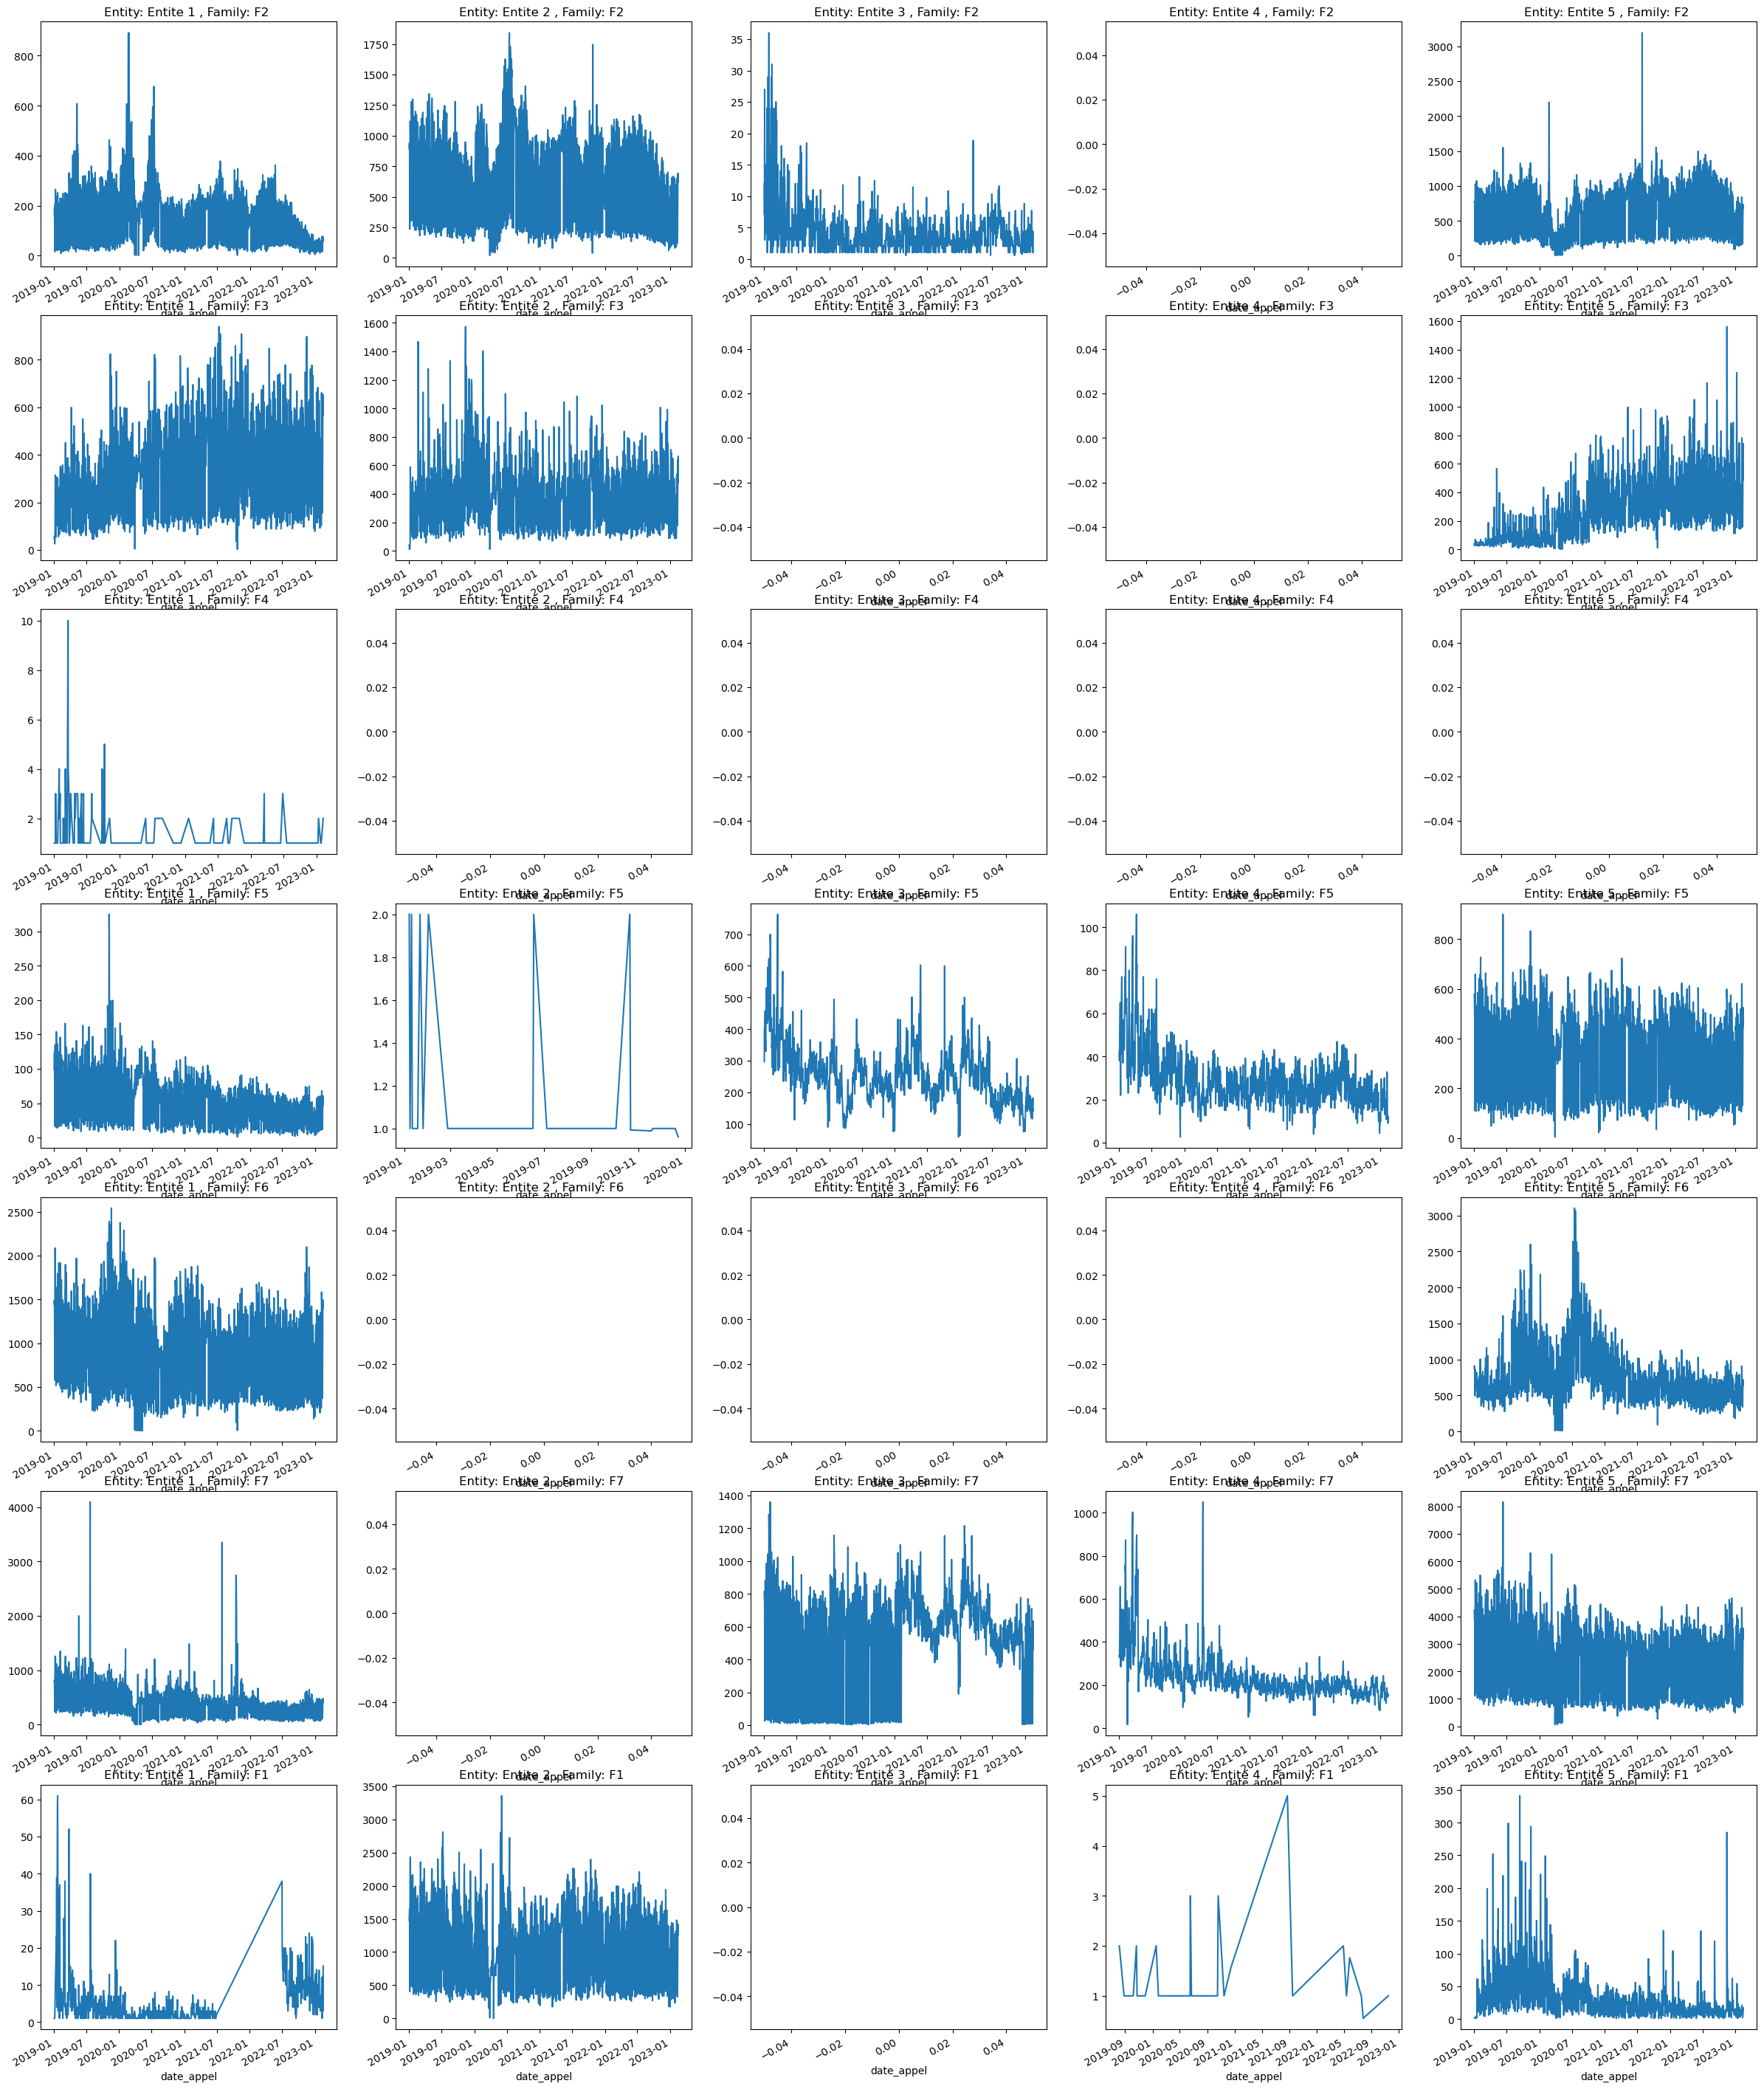

In [44]:

liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        df['Nombre_entrants_corrige'].plot(ax=ax)
        ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
        add_confinement(ax)


### Weekly

In [43]:
len(df_tel.index)

23783

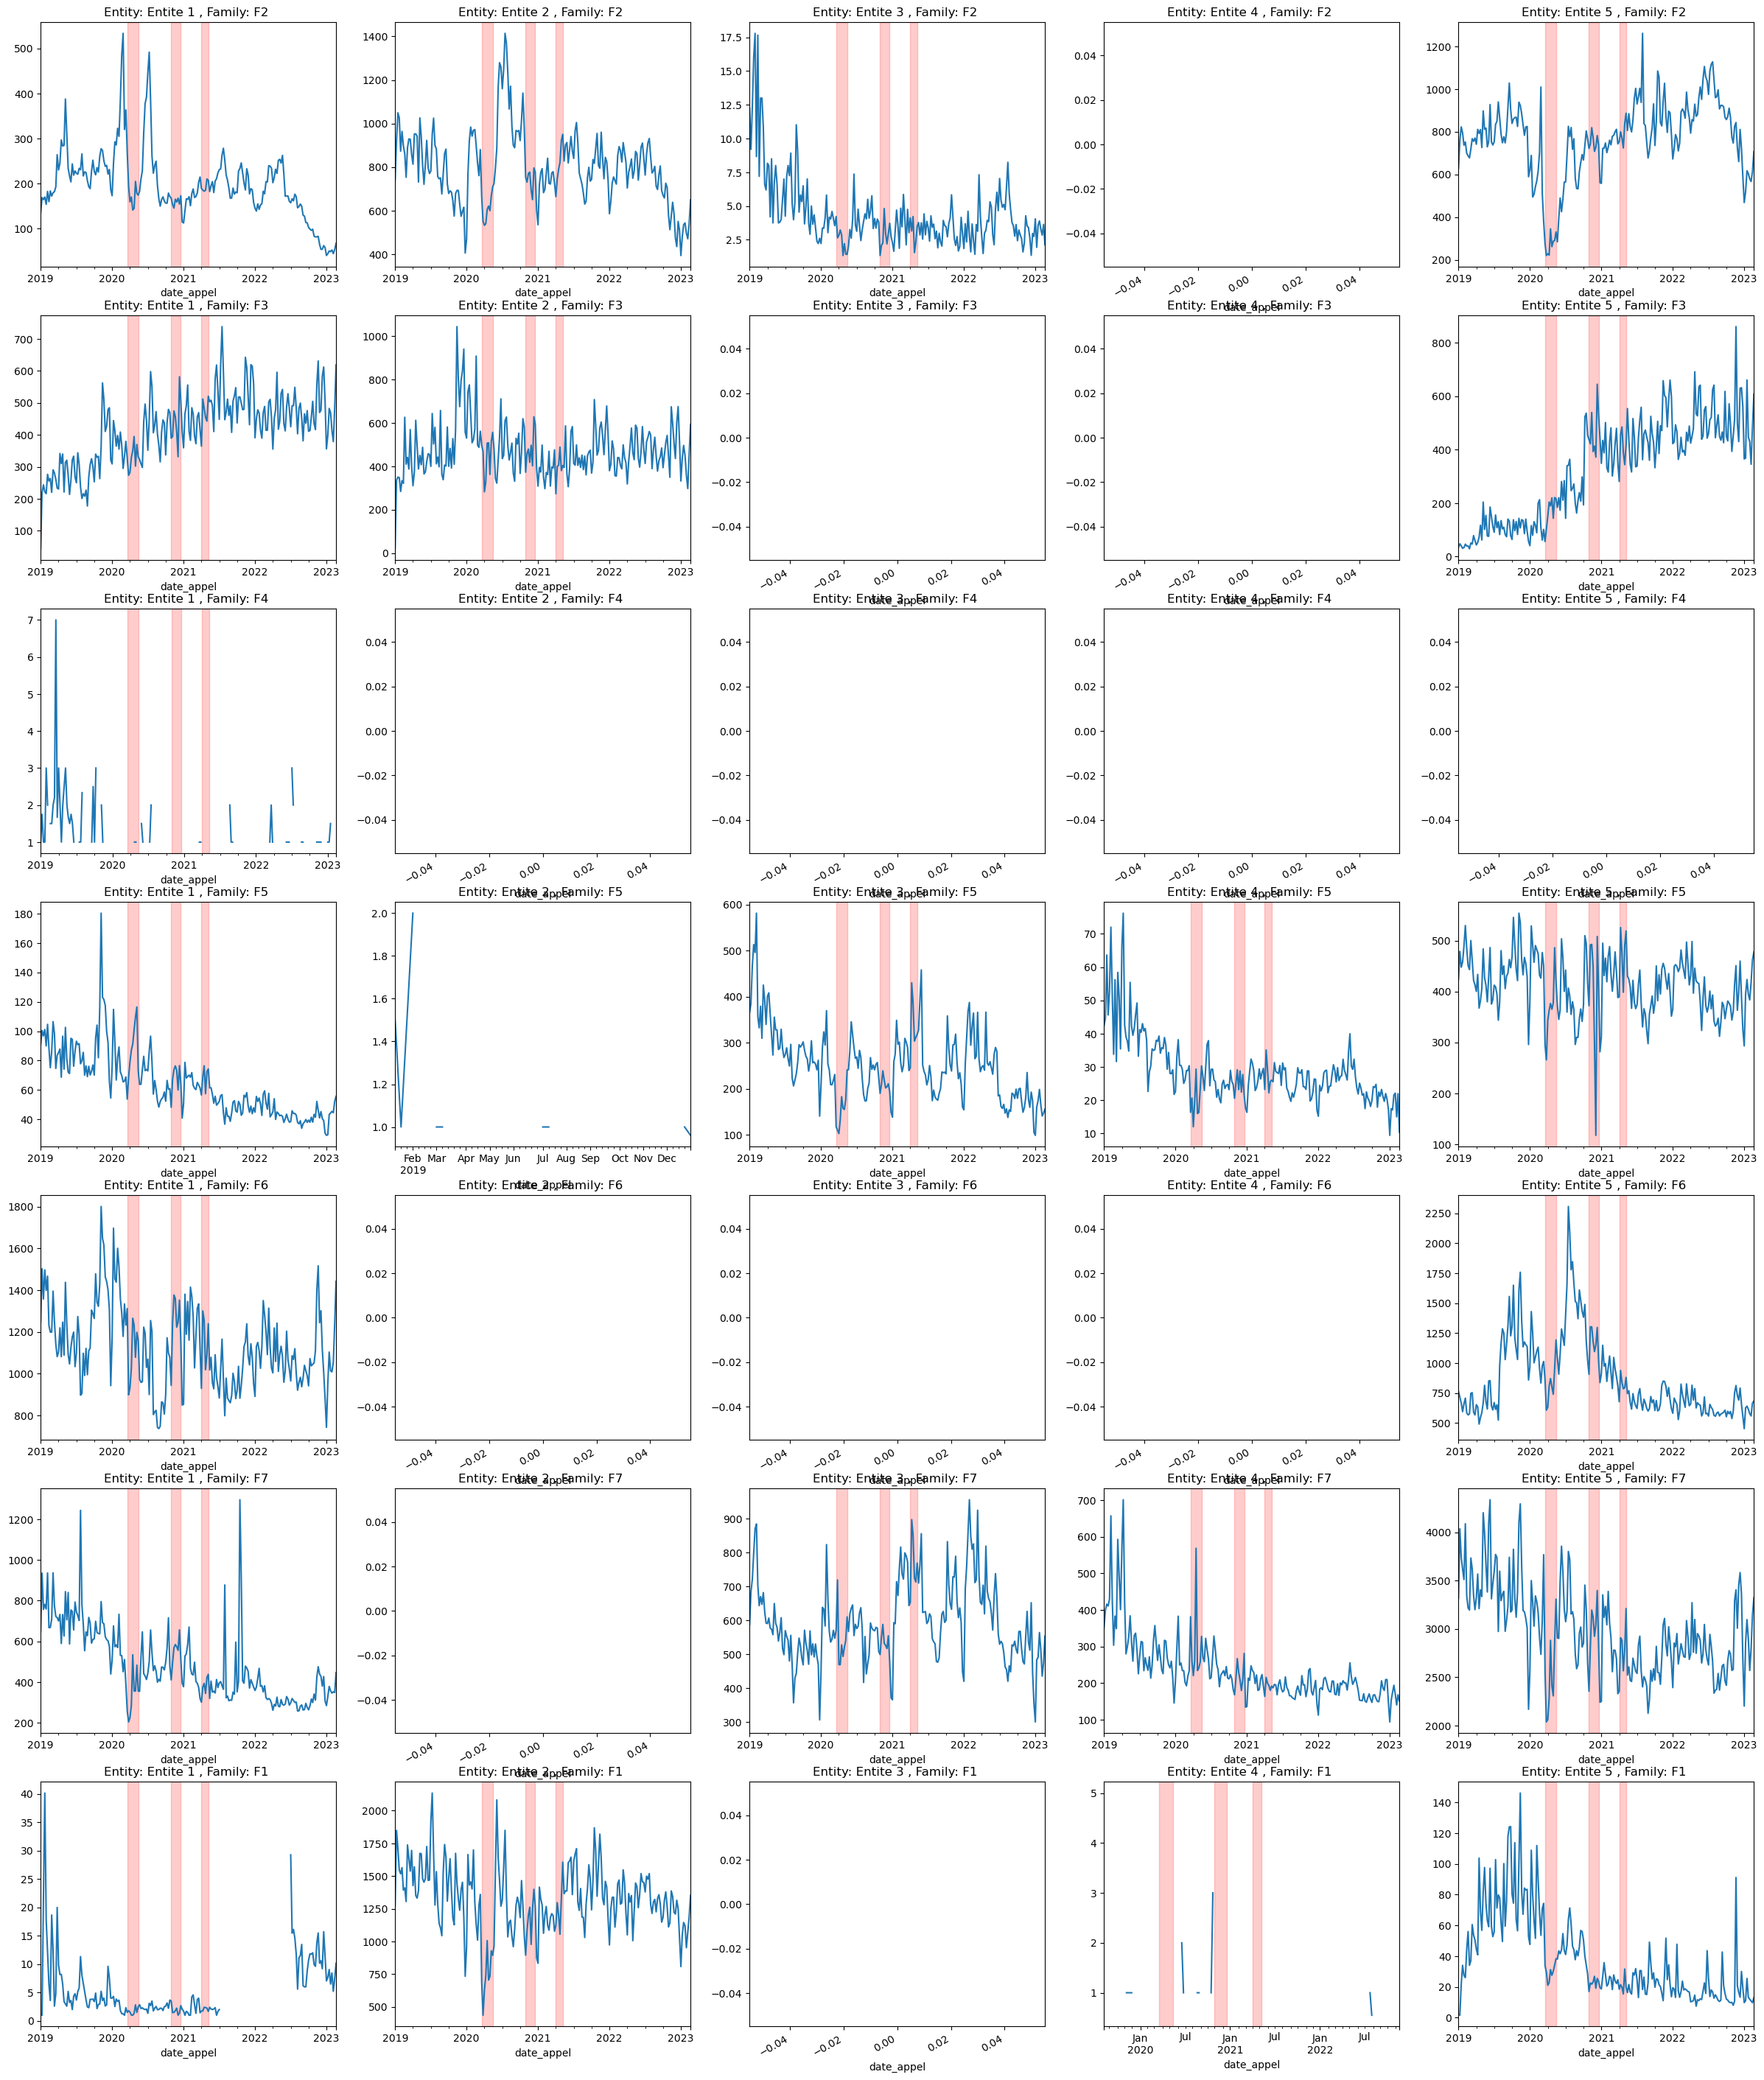

In [84]:

liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0:  
            df['Nombre_entrants_corrige'].resample("W").mean().plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            add_confinement(ax)
        else:
            df['Nombre_entrants_corrige'].plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            



### Monthly

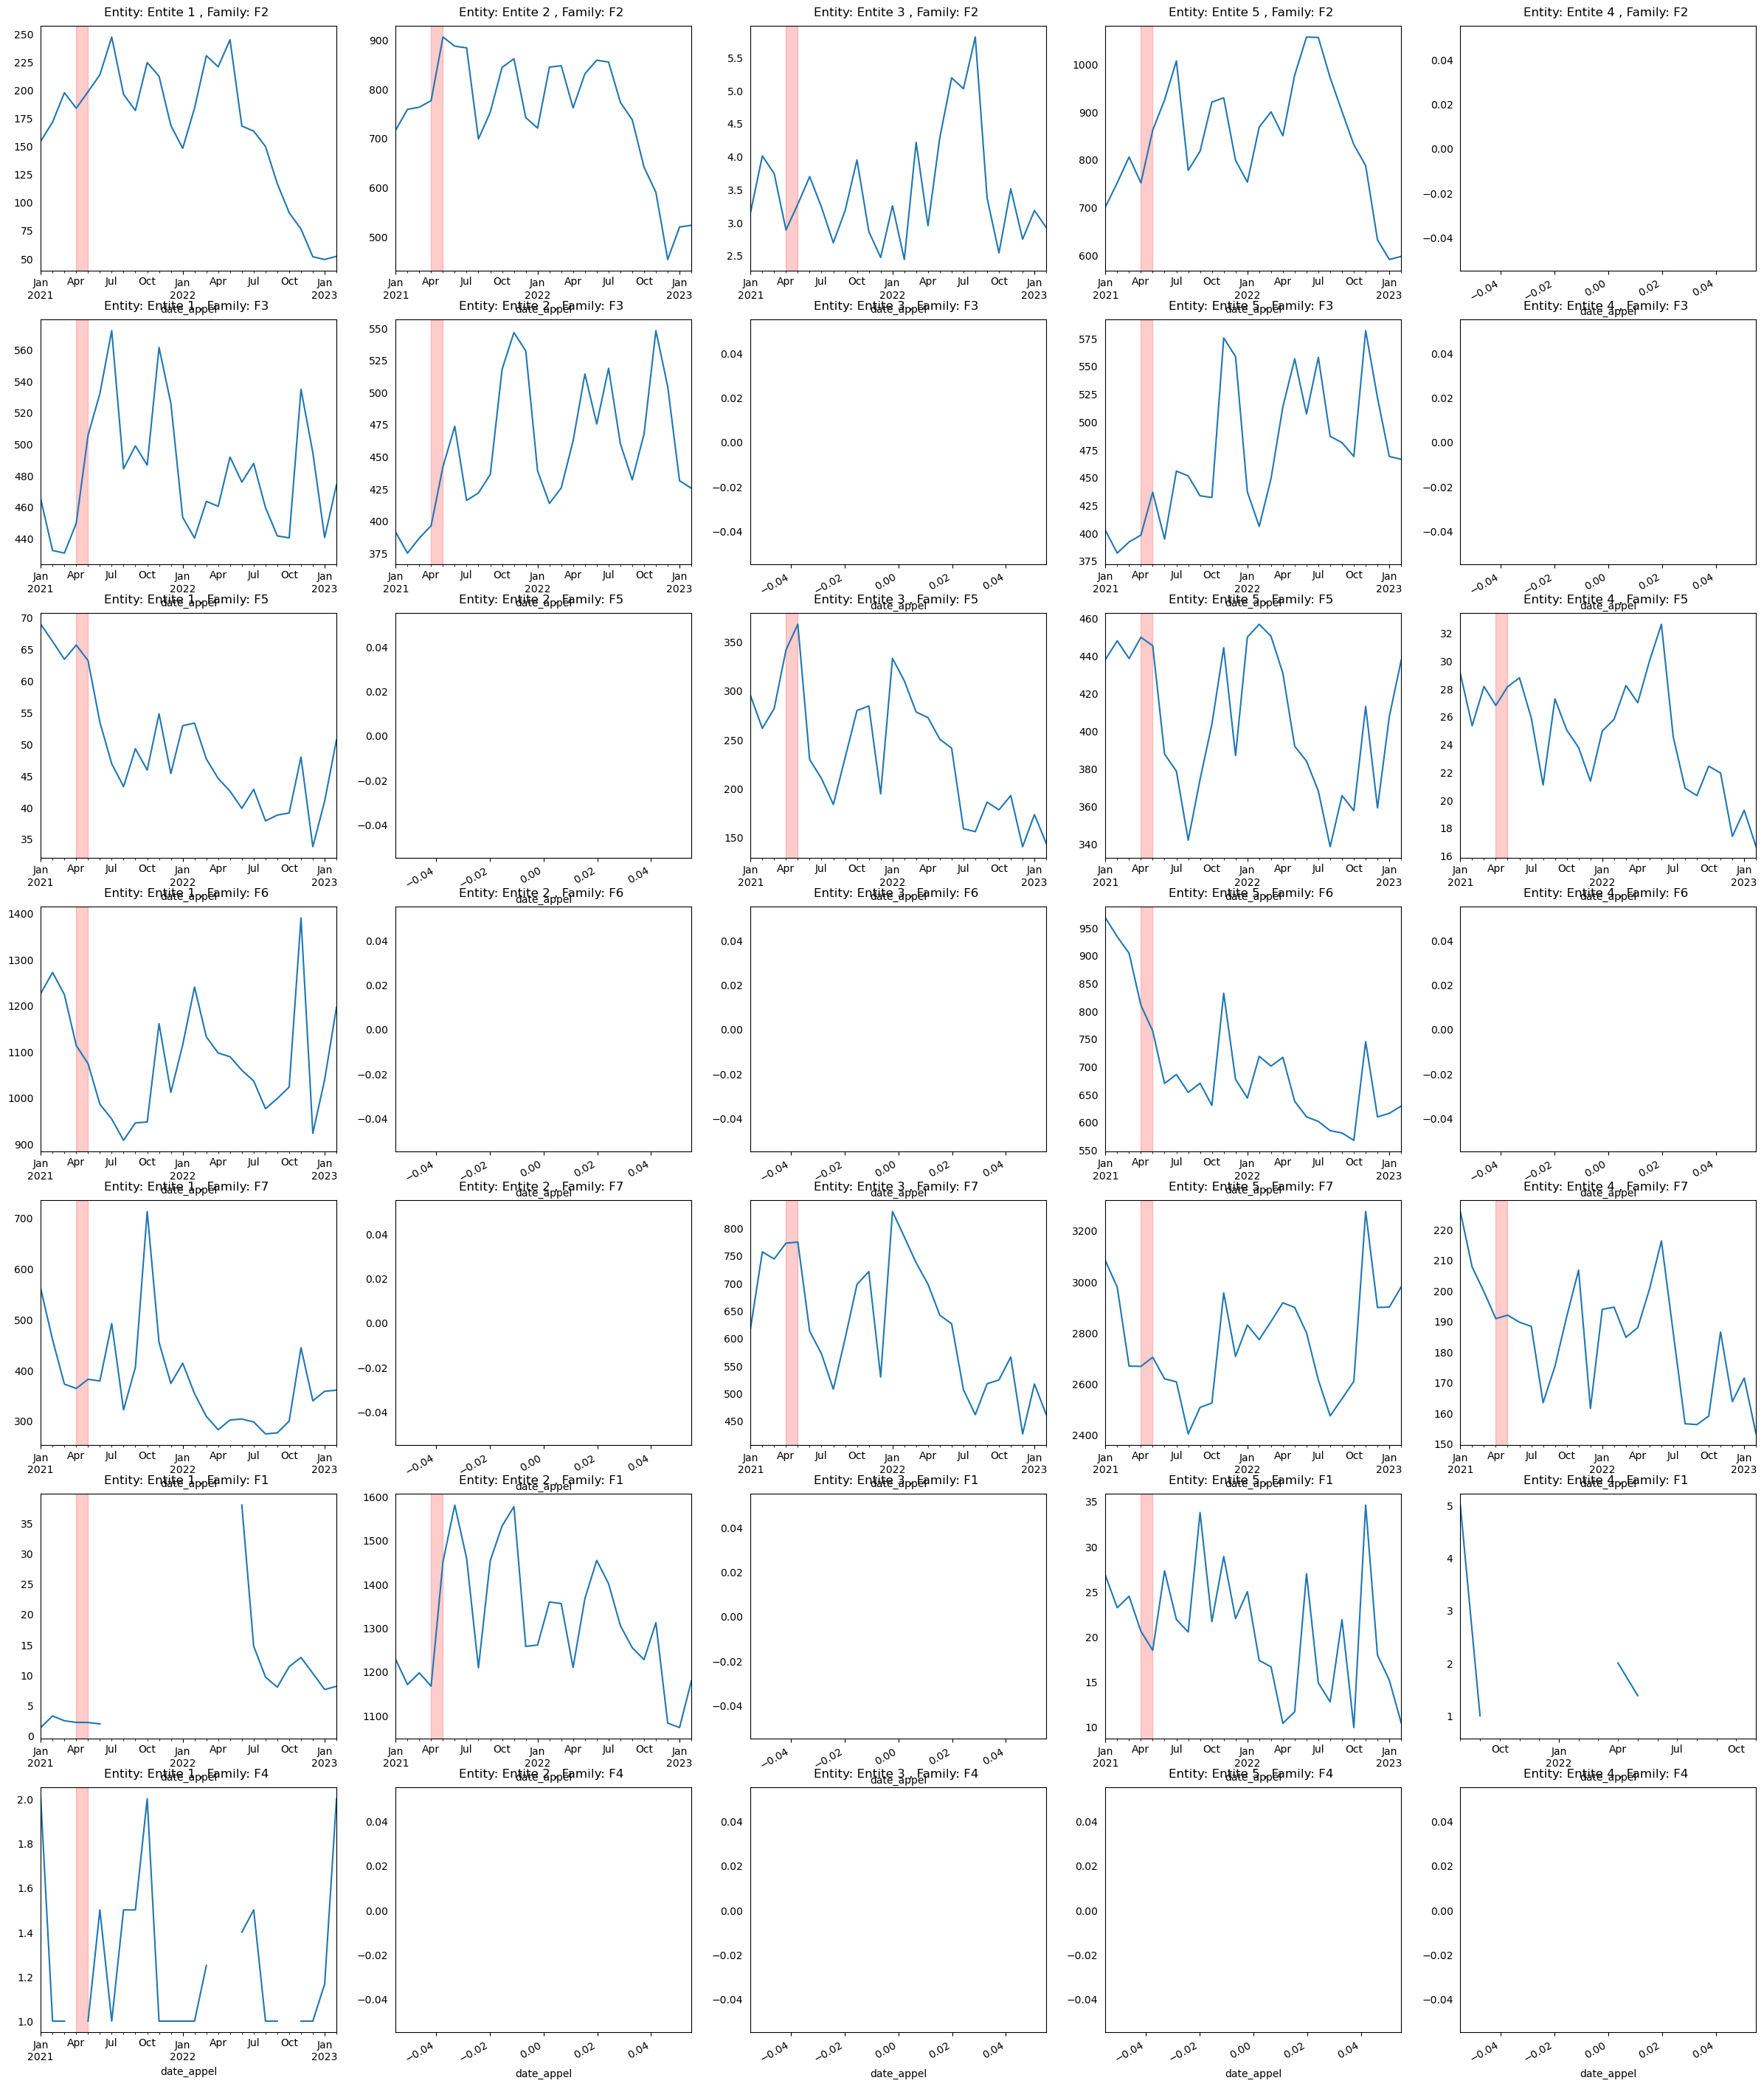

In [204]:
df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)
df_tel = df_tel.loc[ "2021-01-01":,:]

liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0:  
            df['Nombre_entrants_corrige'].resample("M").mean().plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            add_confinement(ax)
        else:
            df['Nombre_entrants_corrige'].plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            



### Yearly

In [62]:
df_year = df_tel
df_year.reset_index(inplace=True)

# Prepare data
df_year['year'] = [d.year for d in df_year.date_appel]
years = df_year['year'].unique()

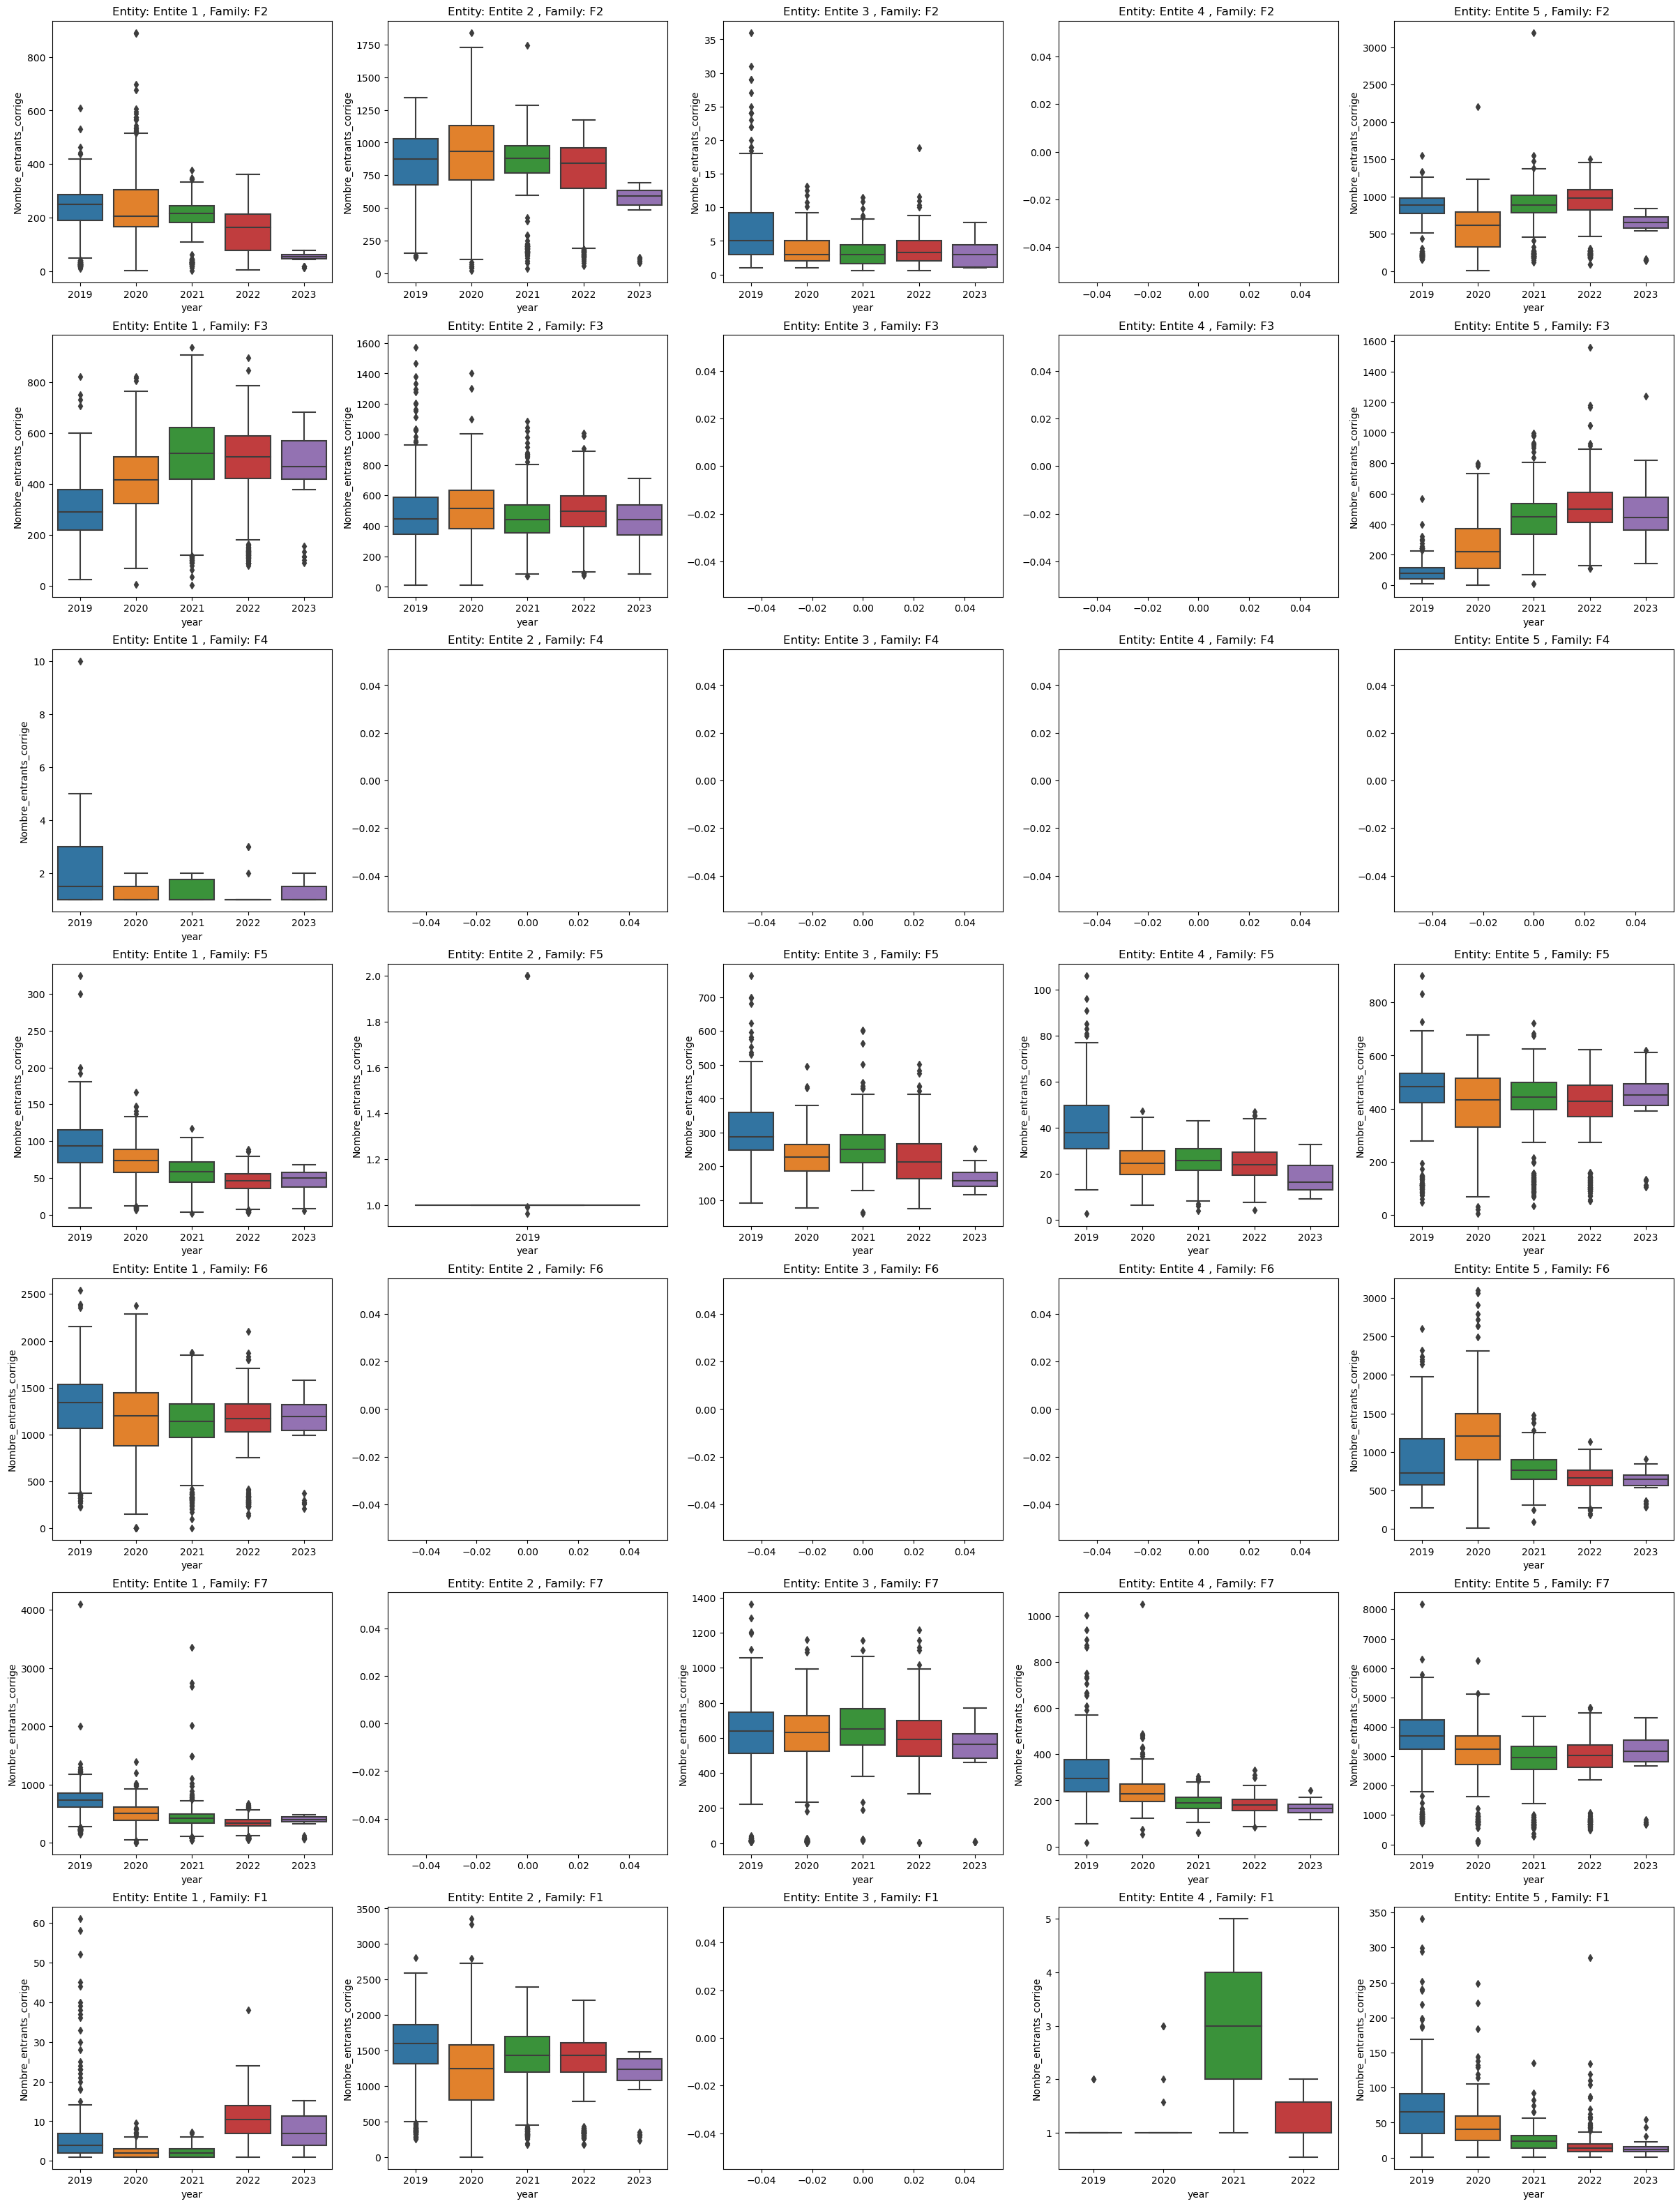

In [61]:

liste_famille = df_year.Famille.unique()
liste_entite = df_year.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_year[(df_year["Entite"] == entite)& (df_year["Famille"] == famille)]
        if len(df.index)>0:  
        
            sns.boxplot(x='year', y='Nombre_entrants_corrige', data=df, ax=ax)

        # Set Title
            ax.set_title(f"Entity: {entite} , Family: {famille} ")
        
        
        else:
            df['Nombre_entrants_corrige'].plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            

plt.show()


## Seasonality

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)
df_tel = df_tel.loc[ "2021-01-01":,:]

### Monthly

In [207]:
df_month = df_tel
df_month.reset_index(inplace=True)

# Prepare data
df_month['month'] = [d.strftime('%b') for d in df_month.date_appel]

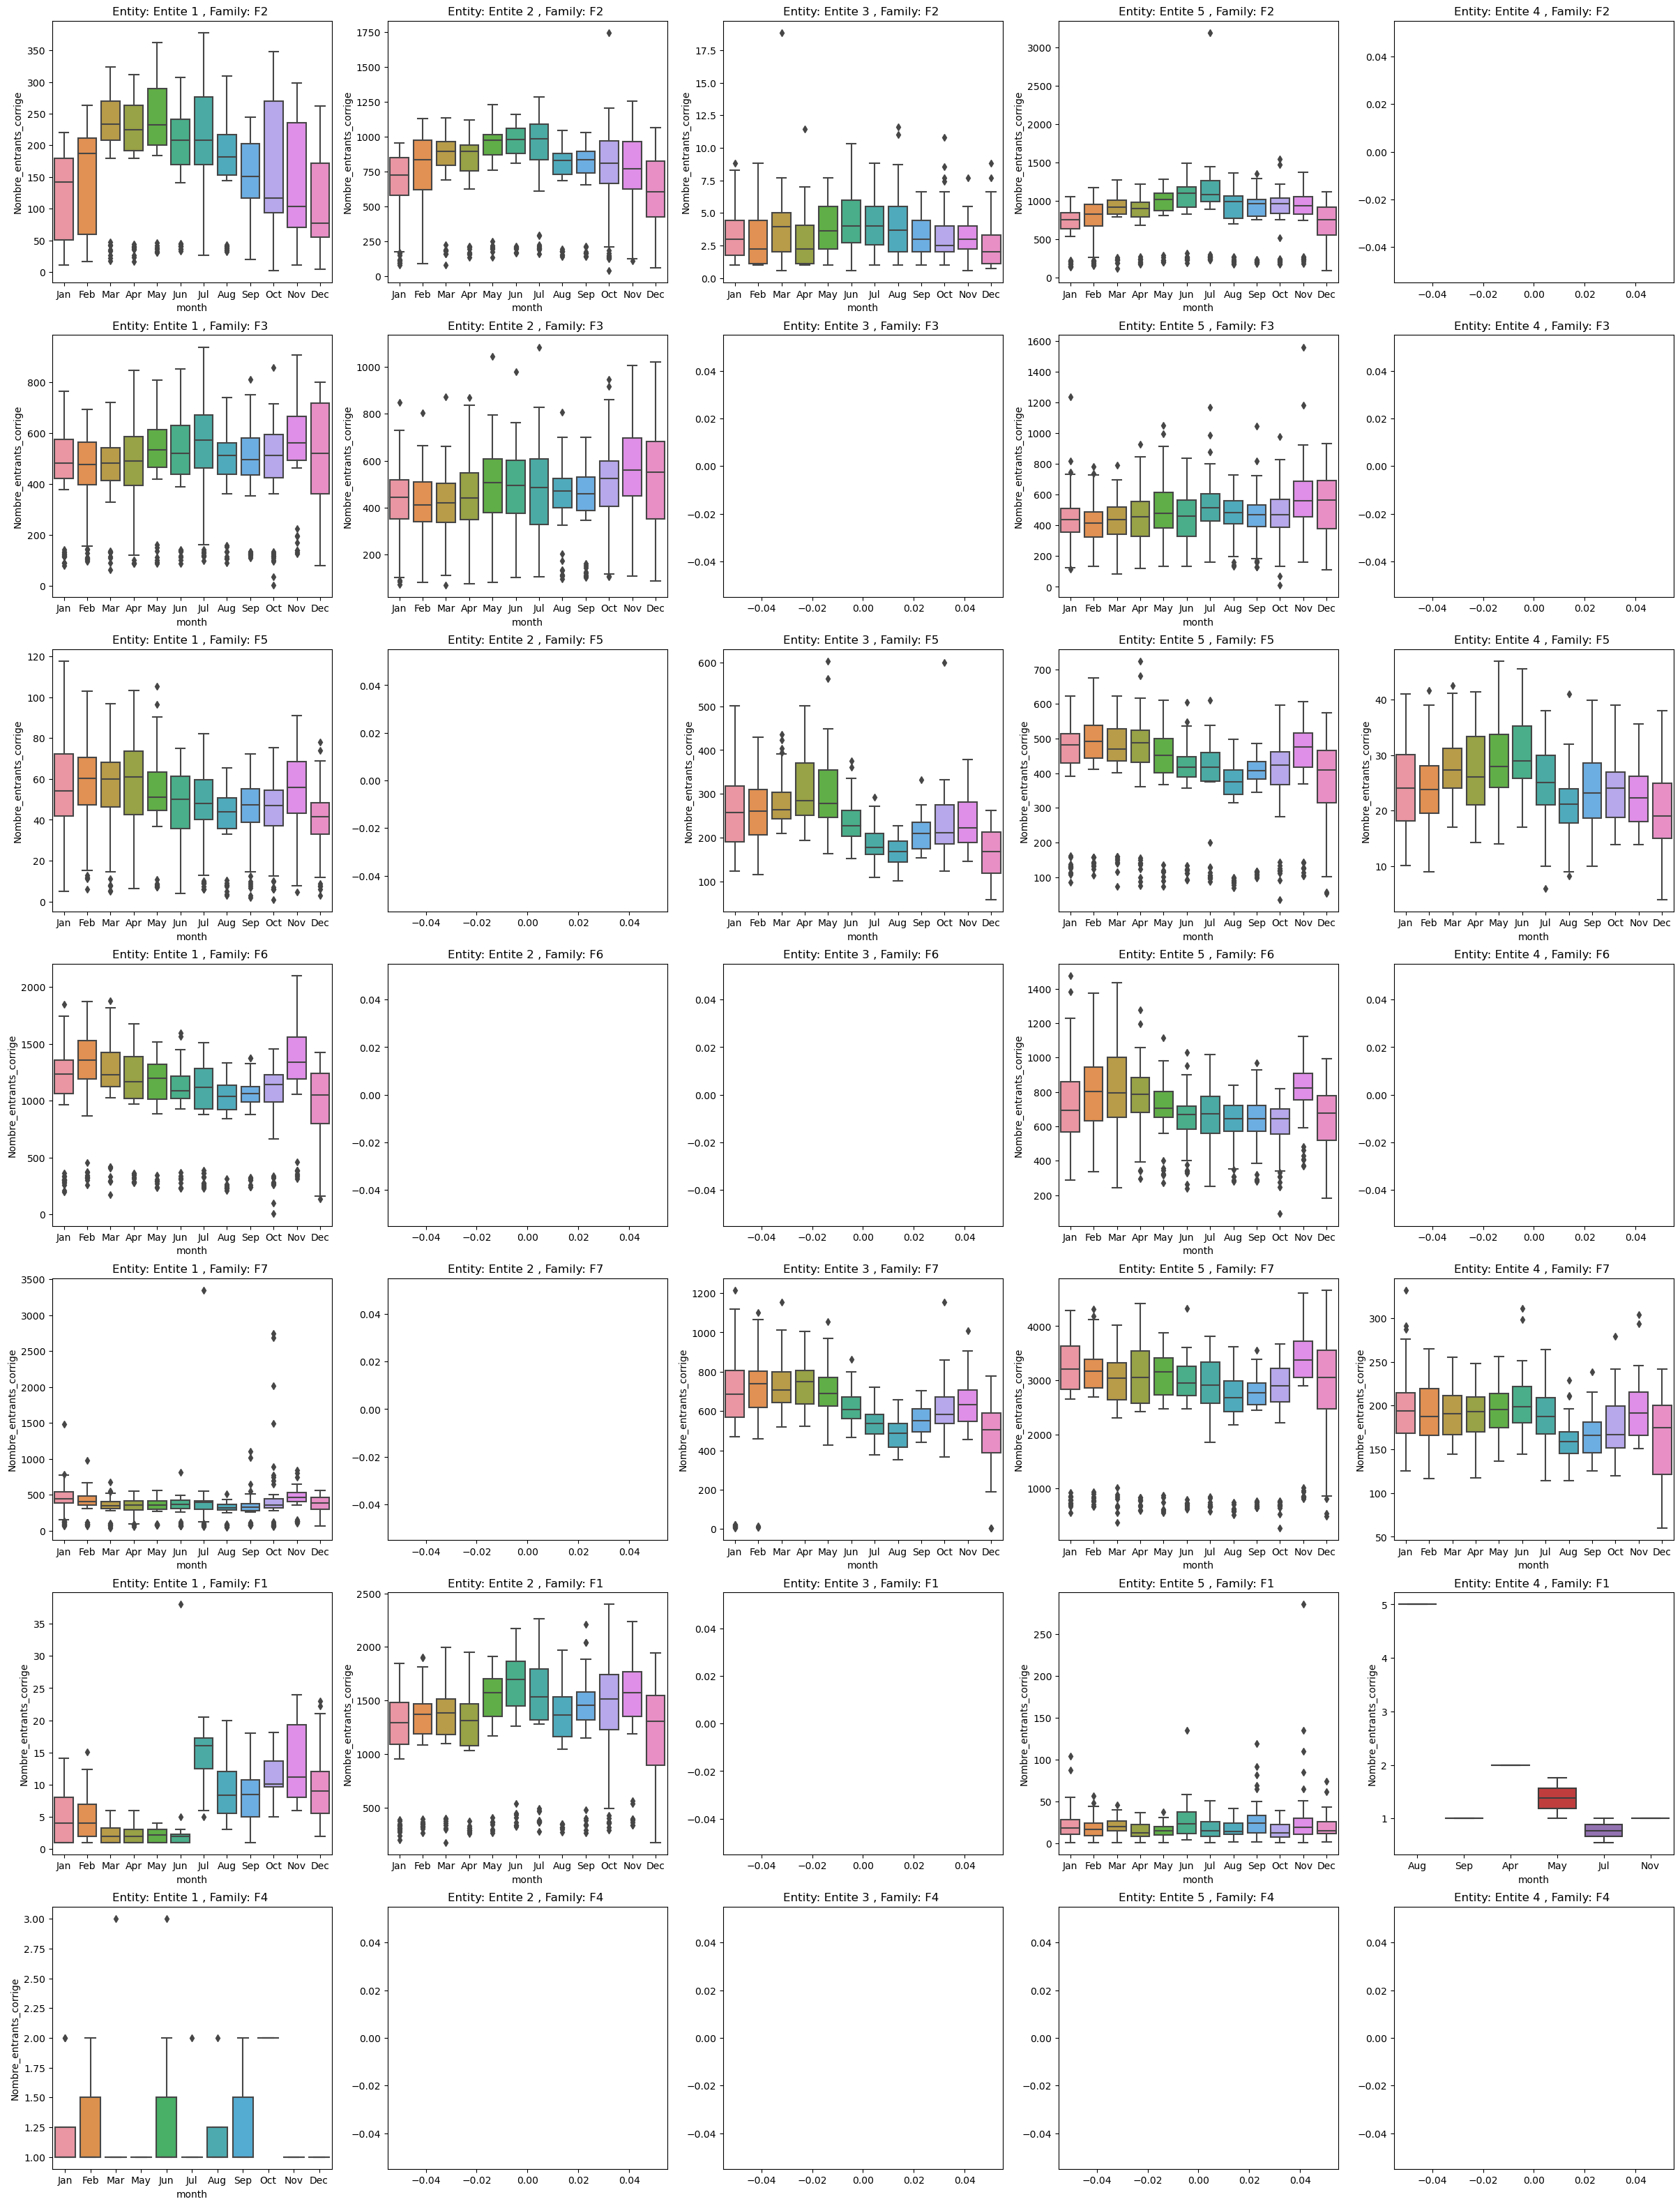

In [89]:

liste_famille = df_month.Famille.unique()
liste_entite = df_month.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_month[(df_month["Entite"] == entite)& (df_month["Famille"] == famille)]
        if len(df.index)>0:  
            # df['year'] = [d.year for d in df.date_appel]
            # years = df['year'].unique()
            # sns.boxplot(x='month', y='Nombre_entrants_corrige', data=df.loc[~df.year.isin(df), :],ax=ax)
            sns.boxplot(x='month', y='Nombre_entrants_corrige', data=df,ax=ax)

        # Set Title
            ax.set_title(f"Entity: {entite} , Family: {famille} ")
        
        
        else:
            df['Nombre_entrants_corrige'].plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            

plt.show()


### Weekly

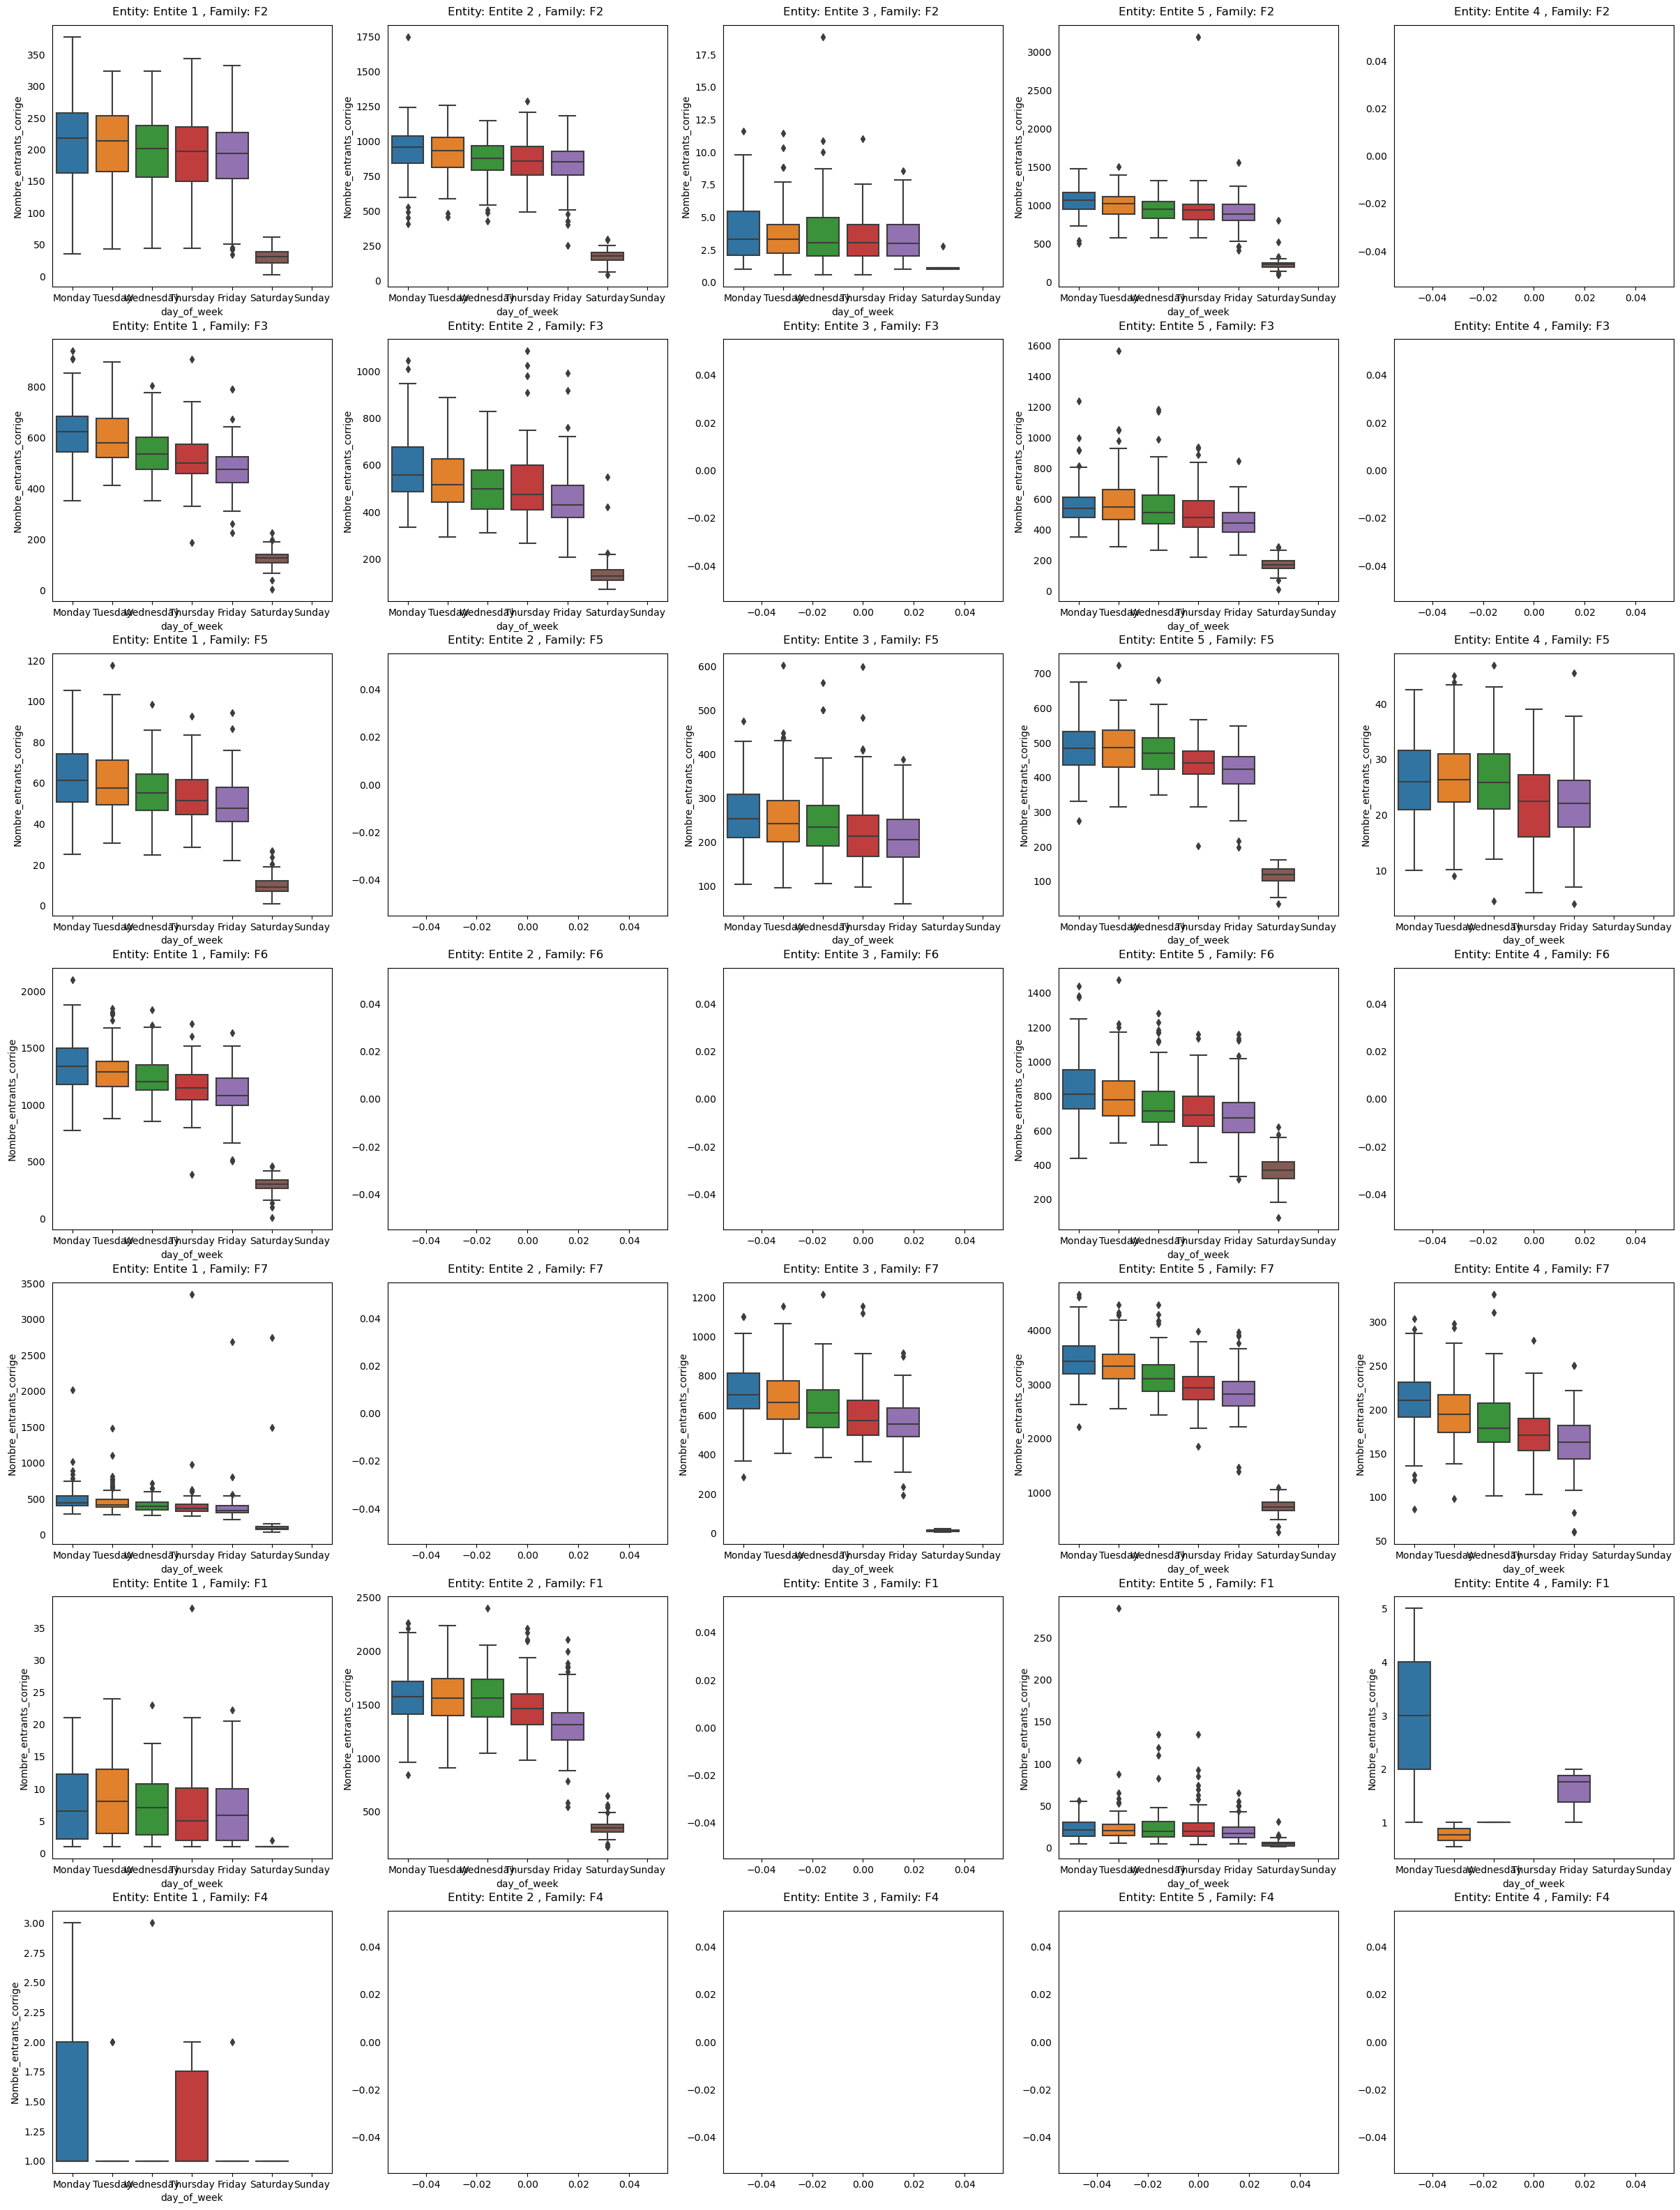

In [211]:
df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)
df_tel = df_tel.loc[ "2021-01-01":,:]
df_day = df_tel
df_day.reset_index(inplace=True)

# Prepare data
df_day['day_of_week'] = df_day.date_appel.dt.day_name()
liste_famille = df_day.Famille.unique()
liste_entite = df_day.Entite.unique()

# Define the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_day[(df_day["Entite"] == entite)& (df_day["Famille"] == famille)]
        if len(df.index)>0:  
            sns.boxplot(x='day_of_week', y='Nombre_entrants_corrige', data=df,ax=ax,order=weekday_order)

        # Set Title
            ax.set_title(f"Entity: {entite} , Family: {famille} ")
        
        
        else:
            df['Nombre_entrants_corrige'].plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            

plt.show()


### Affitive or multiplicative?

Determining whether a time series is multiplicative or additive can be done by visual inspection or statistical analysis. Here are a few methods to help you make that determination:

Visual inspection: Plot the time series and look for patterns. Multiplicative time series tend to exhibit increasing or decreasing fluctuations in magnitude over time, while additive time series typically show a relatively constant level of fluctuations. If the magnitude of the fluctuations appears to be proportional to the level of the time series, it is likely multiplicative. If the fluctuations seem to have a constant amplitude regardless of the level, it is likely additive.
**`--> Fluctuations look contants so additive`**

Decomposition: Decompose the time series into its trend, seasonal, and residual components using methods like seasonal decomposition of time series (e.g., STL decomposition). If the amplitude of the seasonal component remains relatively constant throughout the time series, it suggests additivity. On the other hand, if the amplitude of the seasonal component varies with the level of the time series, it indicates multiplicativity.
**`--> Looks additive for the family`**

Statistical analysis: Perform statistical tests to assess the presence of trend and seasonality in the time series. Tests like the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test can help determine if there is a trend component present. If the trend is present, it indicates additivity. Additionally, analyzing the autocorrelation structure of the series can provide insights. If the autocorrelation increases with the level of the series, it suggests multiplicativity.
**`--> To do`**

Domain knowledge: Consider the underlying factors and context of the time series. If the series represents phenomena where fluctuations are proportional to the level (e.g., population growth, sales with seasonality), it is more likely to be multiplicative. If the fluctuations are independent of the level (e.g., temperature variation, noise), it is more likely to be additive.
**`--> constant Business (not a start up) so additive`**

In [202]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)

df_tel = df_tel.loc[ "2021-01-01":,:]

df = df_tel[(df_tel["Entite"] == 'Entite 1') & (df_tel["Famille"] == 'F2')]


In [198]:
df = df.asfreq('d')
df.Entite = df.Entite.fillna('Entite 1')
df.Famille = df.Famille.fillna('F2')
df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.fillna(1)

In [123]:
df

Entite Famille  Nombre_entrants_corrige
date_appel                                           
2021-01-02  Entite 1      F2                13.200000
2021-01-03  Entite 1      F2                 1.000000
2021-01-04  Entite 1      F2               171.637875
2021-01-05  Entite 1      F2               139.823805
2021-01-06  Entite 1      F2               186.613478
...              ...     ...                      ...
2023-02-11  Entite 1      F2                16.170000
2023-02-12  Entite 1      F2                 1.000000
2023-02-13  Entite 1      F2                75.822353
2023-02-14  Entite 1      F2                65.276712
2023-02-15  Entite 1      F2                59.216667

[775 rows x 3 columns]

In [203]:
result_add_not_extra = seasonal_decompose(df['Nombre_entrants_corrige'], model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

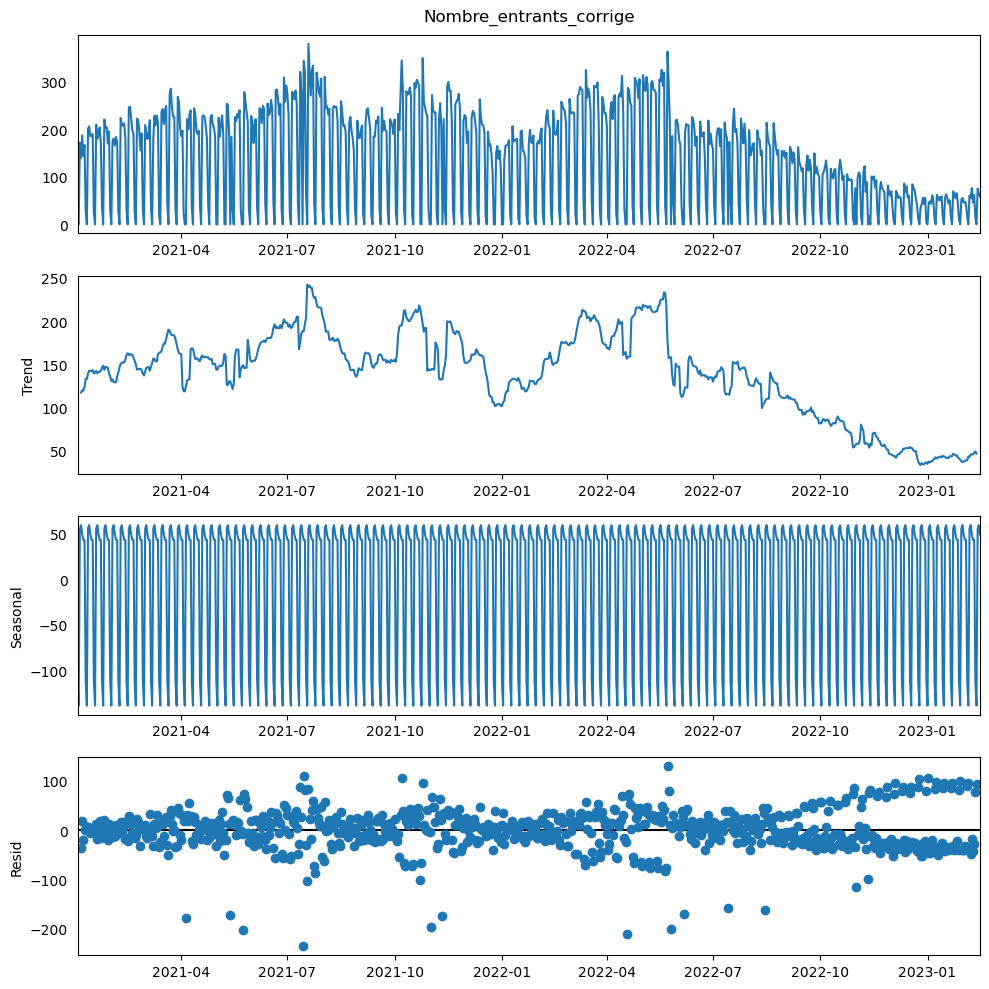

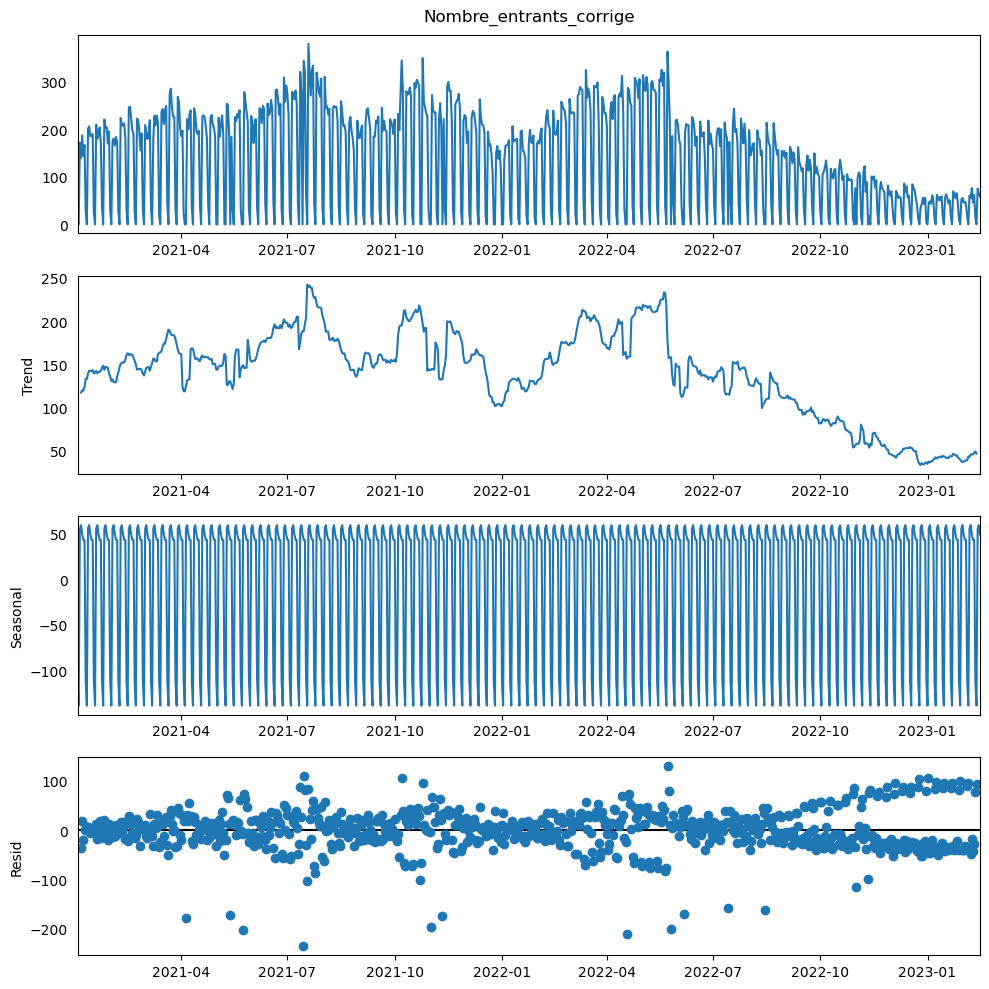

In [201]:
result_add_not_extra.plot()

In [195]:
dir(result_add)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

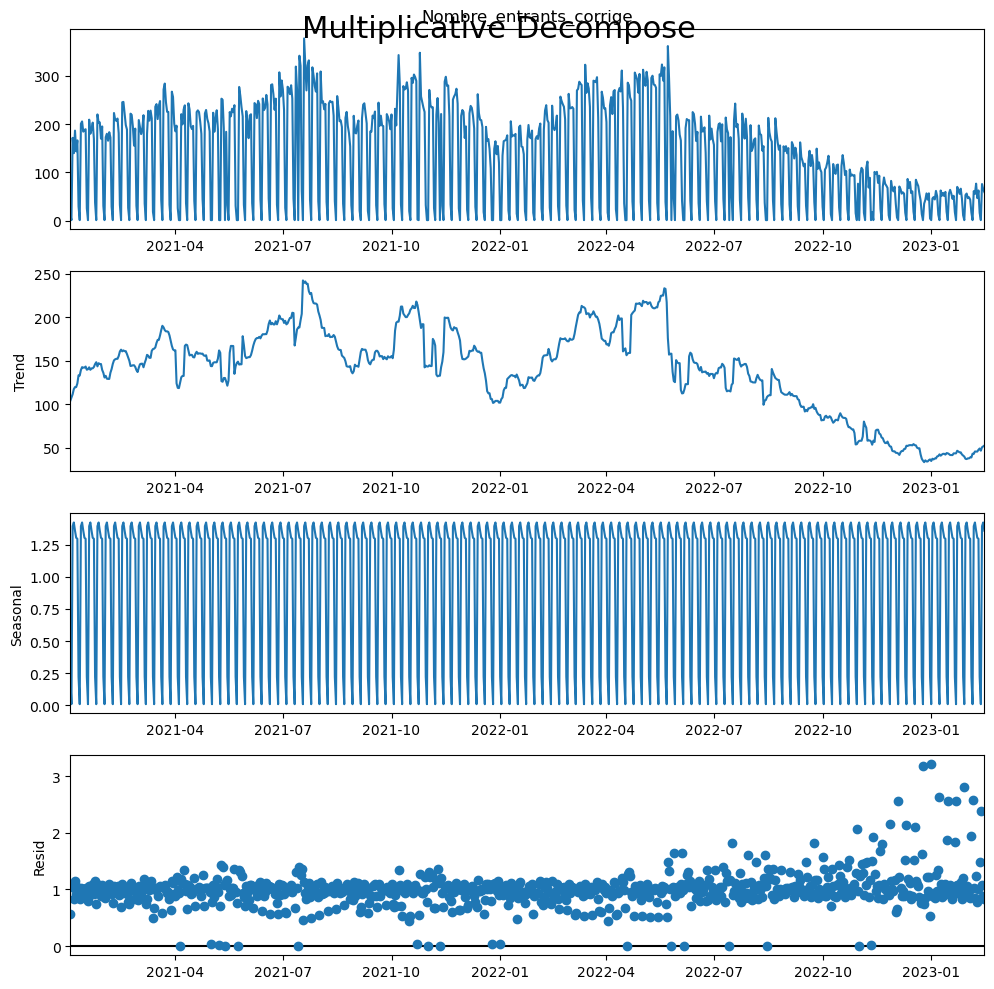

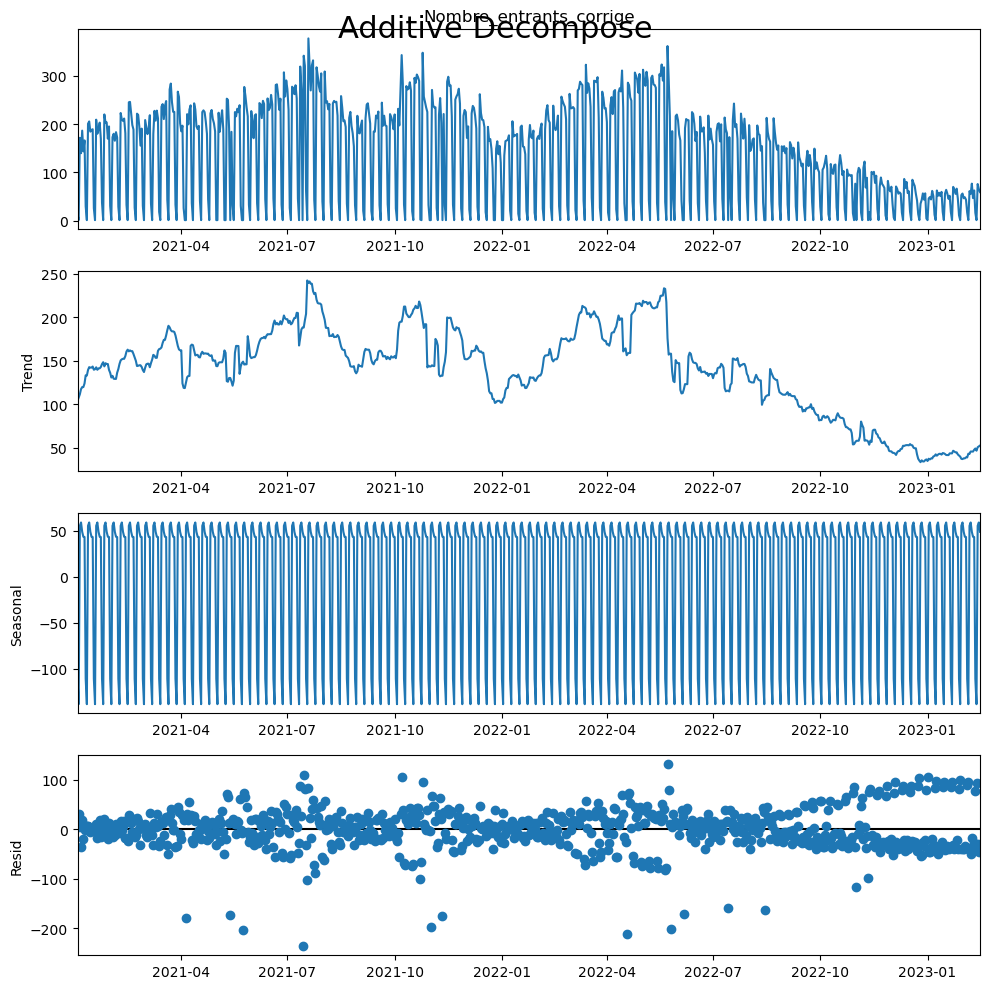

In [124]:


# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Nombre_entrants_corrige'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Nombre_entrants_corrige'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Stationarity

In [125]:
df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)

df_tel = df_tel.loc[ "2021-01-01":,:]

df = df_tel[(df_tel["Entite"] == 'Entite 1') & (df_tel["Famille"] == 'F2')]


In [133]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df.Nombre_entrants_corrige, autolag='AIC')
print(f'Augmented Dickey Fuller test')
print(f'     p-value: {result[1]}')
print("     L'hypothèse nulle est que la serie n'est pas stationaire ")
if result[1]<0.05:
    print("     --> On rejette l'hypothèse nulle car la p-value est < 0.05")
    print("\n")
    print("     La série est donc stationaire")
else:
    print("     On je peux pas rejeter l'hypothèse nulle car la p-value est > 0.05")
    print("\n")
    print("     On ne peut pas affirmer que la série est non stationnaire")
print("\n")
# KPSS Test
result = kpss(df.Nombre_entrants_corrige, regression='c')
print('Kwiatkowski-Phillips-Schmidt-Shin')
print(f'     p-value: {result[1]}')
print("     L'hypothèse nulle est que la serie est stationaire autour d'un trend")
if result[1]<0.05:
    print("     On rejette l'hypothèse nulle car la p-value est < 0.05")
    print("\n")
    print("     --> La série n'est donc pas stationaire autour d'un trend")
else:
    print("     On je peux pas rejeter l'hypothèse nulle car la p-value est > 0.05")
    print("\n")
    print("     On ne peut pas affirmer que la série est stationnaire autour d'un trend")
print("\n")
print("\n")



    

Augmented Dickey Fuller test
     p-value: 0.7434669859411565
     L'hypothèse nulle est que la serie n'est pas stationaire 
     On je peux pas rejeter l'hypothèse nulle car la p-value est > 0.05


     On ne peut pas affirmer que la série est non stationnaire


Kwiatkowski-Phillips-Schmidt-Shin
     p-value: 0.01
     L'hypothèse nulle est que la serie est stationaire autour d'un trend
     On rejette l'hypothèse nulle car la p-value est < 0.05


     --> La série n'est donc pas stationaire autour d'un trend






/usr/local/Caskroom/miniconda/base/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [170]:
df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)
df_tel = df_tel.loc[ "2021-01-01":,:]

liste_famille = df_day.Famille.unique()
liste_entite = df_day.Entite.unique()
df_test = pd.DataFrame(columns=["Entite",'Famille','ADF','KPSS'])

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        row_dict = {}
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        row_dict['Entite'] = entite
        row_dict['Famille'] = famille
        try:
            result = adfuller(df.Nombre_entrants_corrige, autolag='AIC')
            if result[1]<0.05:
                row_dict['ADF'] = "Non stationnaire"
            else:
                row_dict['ADF'] = "peut pas dire"
            result = kpss(df.Nombre_entrants_corrige, regression='c')
            if result[1]<0.05:
                row_dict['KPSS'] = "peut pas dire"
            else:
                row_dict['KPSS'] = "Trend Stationnaire"
        except ValueError:
            row_dict['ADF'] = "empty"
            row_dict['KPSS'] = "empty"
        df_test = df_test.append(row_dict, ignore_index=True)
        

/usr/local/Caskroom/miniconda/base/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_26494/3116956199.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(row_dict, ignore_index=True)
/usr/local/Caskroom/miniconda/base/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_26494/3116956199.py:28: FutureWarning: The frame.append method is depre

In [171]:
df_test

Entite Famille               ADF                KPSS
0   Entite 1      F2     peut pas dire       peut pas dire
1   Entite 2      F2     peut pas dire       peut pas dire
2   Entite 3      F2  Non stationnaire  Trend Stationnaire
3   Entite 5      F2     peut pas dire       peut pas dire
4   Entite 4      F2             empty               empty
5   Entite 1      F3  Non stationnaire  Trend Stationnaire
6   Entite 2      F3  Non stationnaire       peut pas dire
7   Entite 3      F3             empty               empty
8   Entite 5      F3  Non stationnaire       peut pas dire
9   Entite 4      F3             empty               empty
10  Entite 1      F5     peut pas dire       peut pas dire
11  Entite 2      F5             empty               empty
12  Entite 3      F5     peut pas dire       peut pas dire
13  Entite 5      F5     peut pas dire  Trend Stationnaire
14  Entite 4      F5  Non stationnaire       peut pas dire
15  Entite 1      F6  Non stationnaire  Trend Stationnaire
16  Entite 2      F6             empty               empty
17  Entite 3      F6             empty               empty
18  Entite 5      F6  Non stationnaire       peut pas dire
19  Entite 4      F6             empty               empty
20  Entite 1      F7  Non stationnaire       peut pas dire
21  Entite 2      F7             empty               empty
22  Entite 3      F7     peut pas dire       peut pas dire
23  Entite 5      F7  Non stationnaire  Trend Stationnaire
24  Entite 4      F7  Non stationnaire       peut pas dire
25  Entite 1      F1  Non stationnaire       peut pas dire
26  Entite 2      F1     peut pas dire  Trend Stationnaire
27  Entite 3      F1             empty               empty
28  Entite 5      F1  Non stationnaire       peut pas dire
29  Entite 4      F1  Non stationnaire  Trend Stationnaire
30  Entite 1      F4  Non stationnaire  Trend Stationnaire
31  Entite 2      F4             empty               empty
32  Entite 3      F4             empty               empty
33  Entite 5      F4             empty               empty
34  Entite 4      F4             empty               empty

In [139]:
df_test.to_csv("data/df_test_ADF_KPSS.csv",index=False)

## Auto-correlation

/usr/local/Caskroom/miniconda/base/envs/time_series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


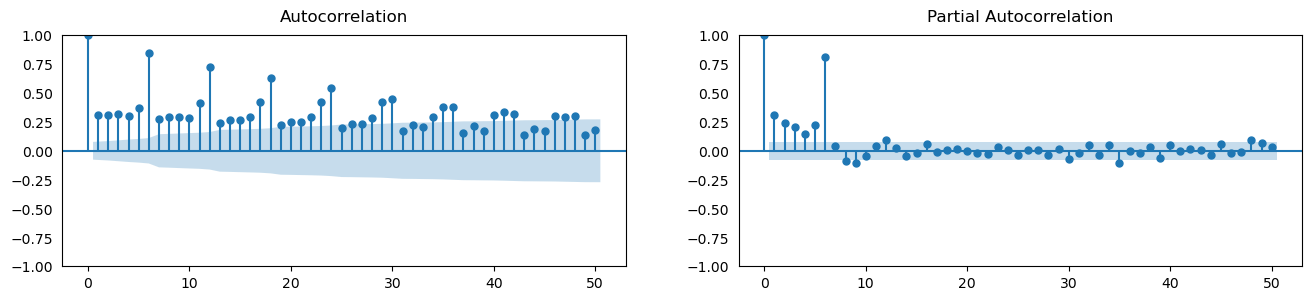

In [155]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)

df_tel = df_tel.loc[ "2021-01-01":,:]

df = df_tel[(df_tel["Entite"] == 'Entite 1') & (df_tel["Famille"] == 'F2')]
#df = df.asfreq('d')
#df.Entite = df.Entite.fillna('Entite 1')
#df.Famille = df.Famille.fillna('F2')
#df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.fillna(1)

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.Nombre_entrants_corrige.tolist(), lags=50, ax=axes[0])
plot_pacf(df.Nombre_entrants_corrige.tolist(), lags=50, ax=axes[1])
plt.show()

In [1]:
import pandas as pd
df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)
df_tel

Entite Famille  Nombre_entrants_corrige
date_appel                                           
2019-01-02  Entite 1      F2               165.000000
2019-01-02  Entite 1      F3                54.000000
2019-01-02  Entite 1      F4                 1.000000
2019-01-02  Entite 1      F5                99.000000
2019-01-02  Entite 1      F6              1487.000000
...              ...     ...                      ...
2023-02-15  Entite 5      F2               708.329712
2023-02-15  Entite 5      F3               738.935876
2023-02-15  Entite 5      F5               463.642180
2023-02-15  Entite 5      F6               694.321440
2023-02-15  Entite 5      F7              3248.480370

[23783 rows x 3 columns]

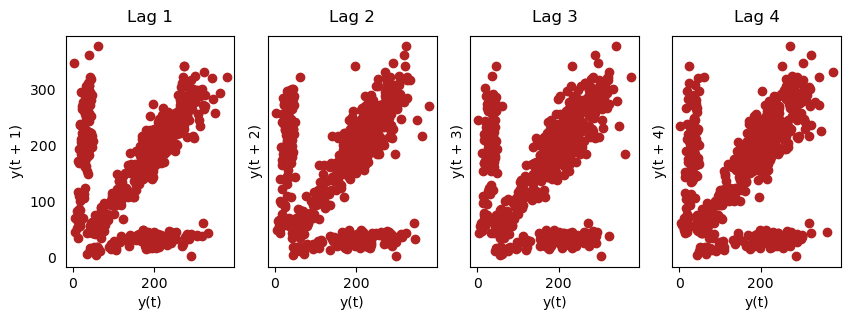

In [145]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)

df_tel = df_tel.loc[ "2021-01-01":,:]

df = df_tel[(df_tel["Entite"] == 'Entite 1') & (df_tel["Famille"] == 'F2')]

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.Nombre_entrants_corrige, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))


plt.show()

lag : 1


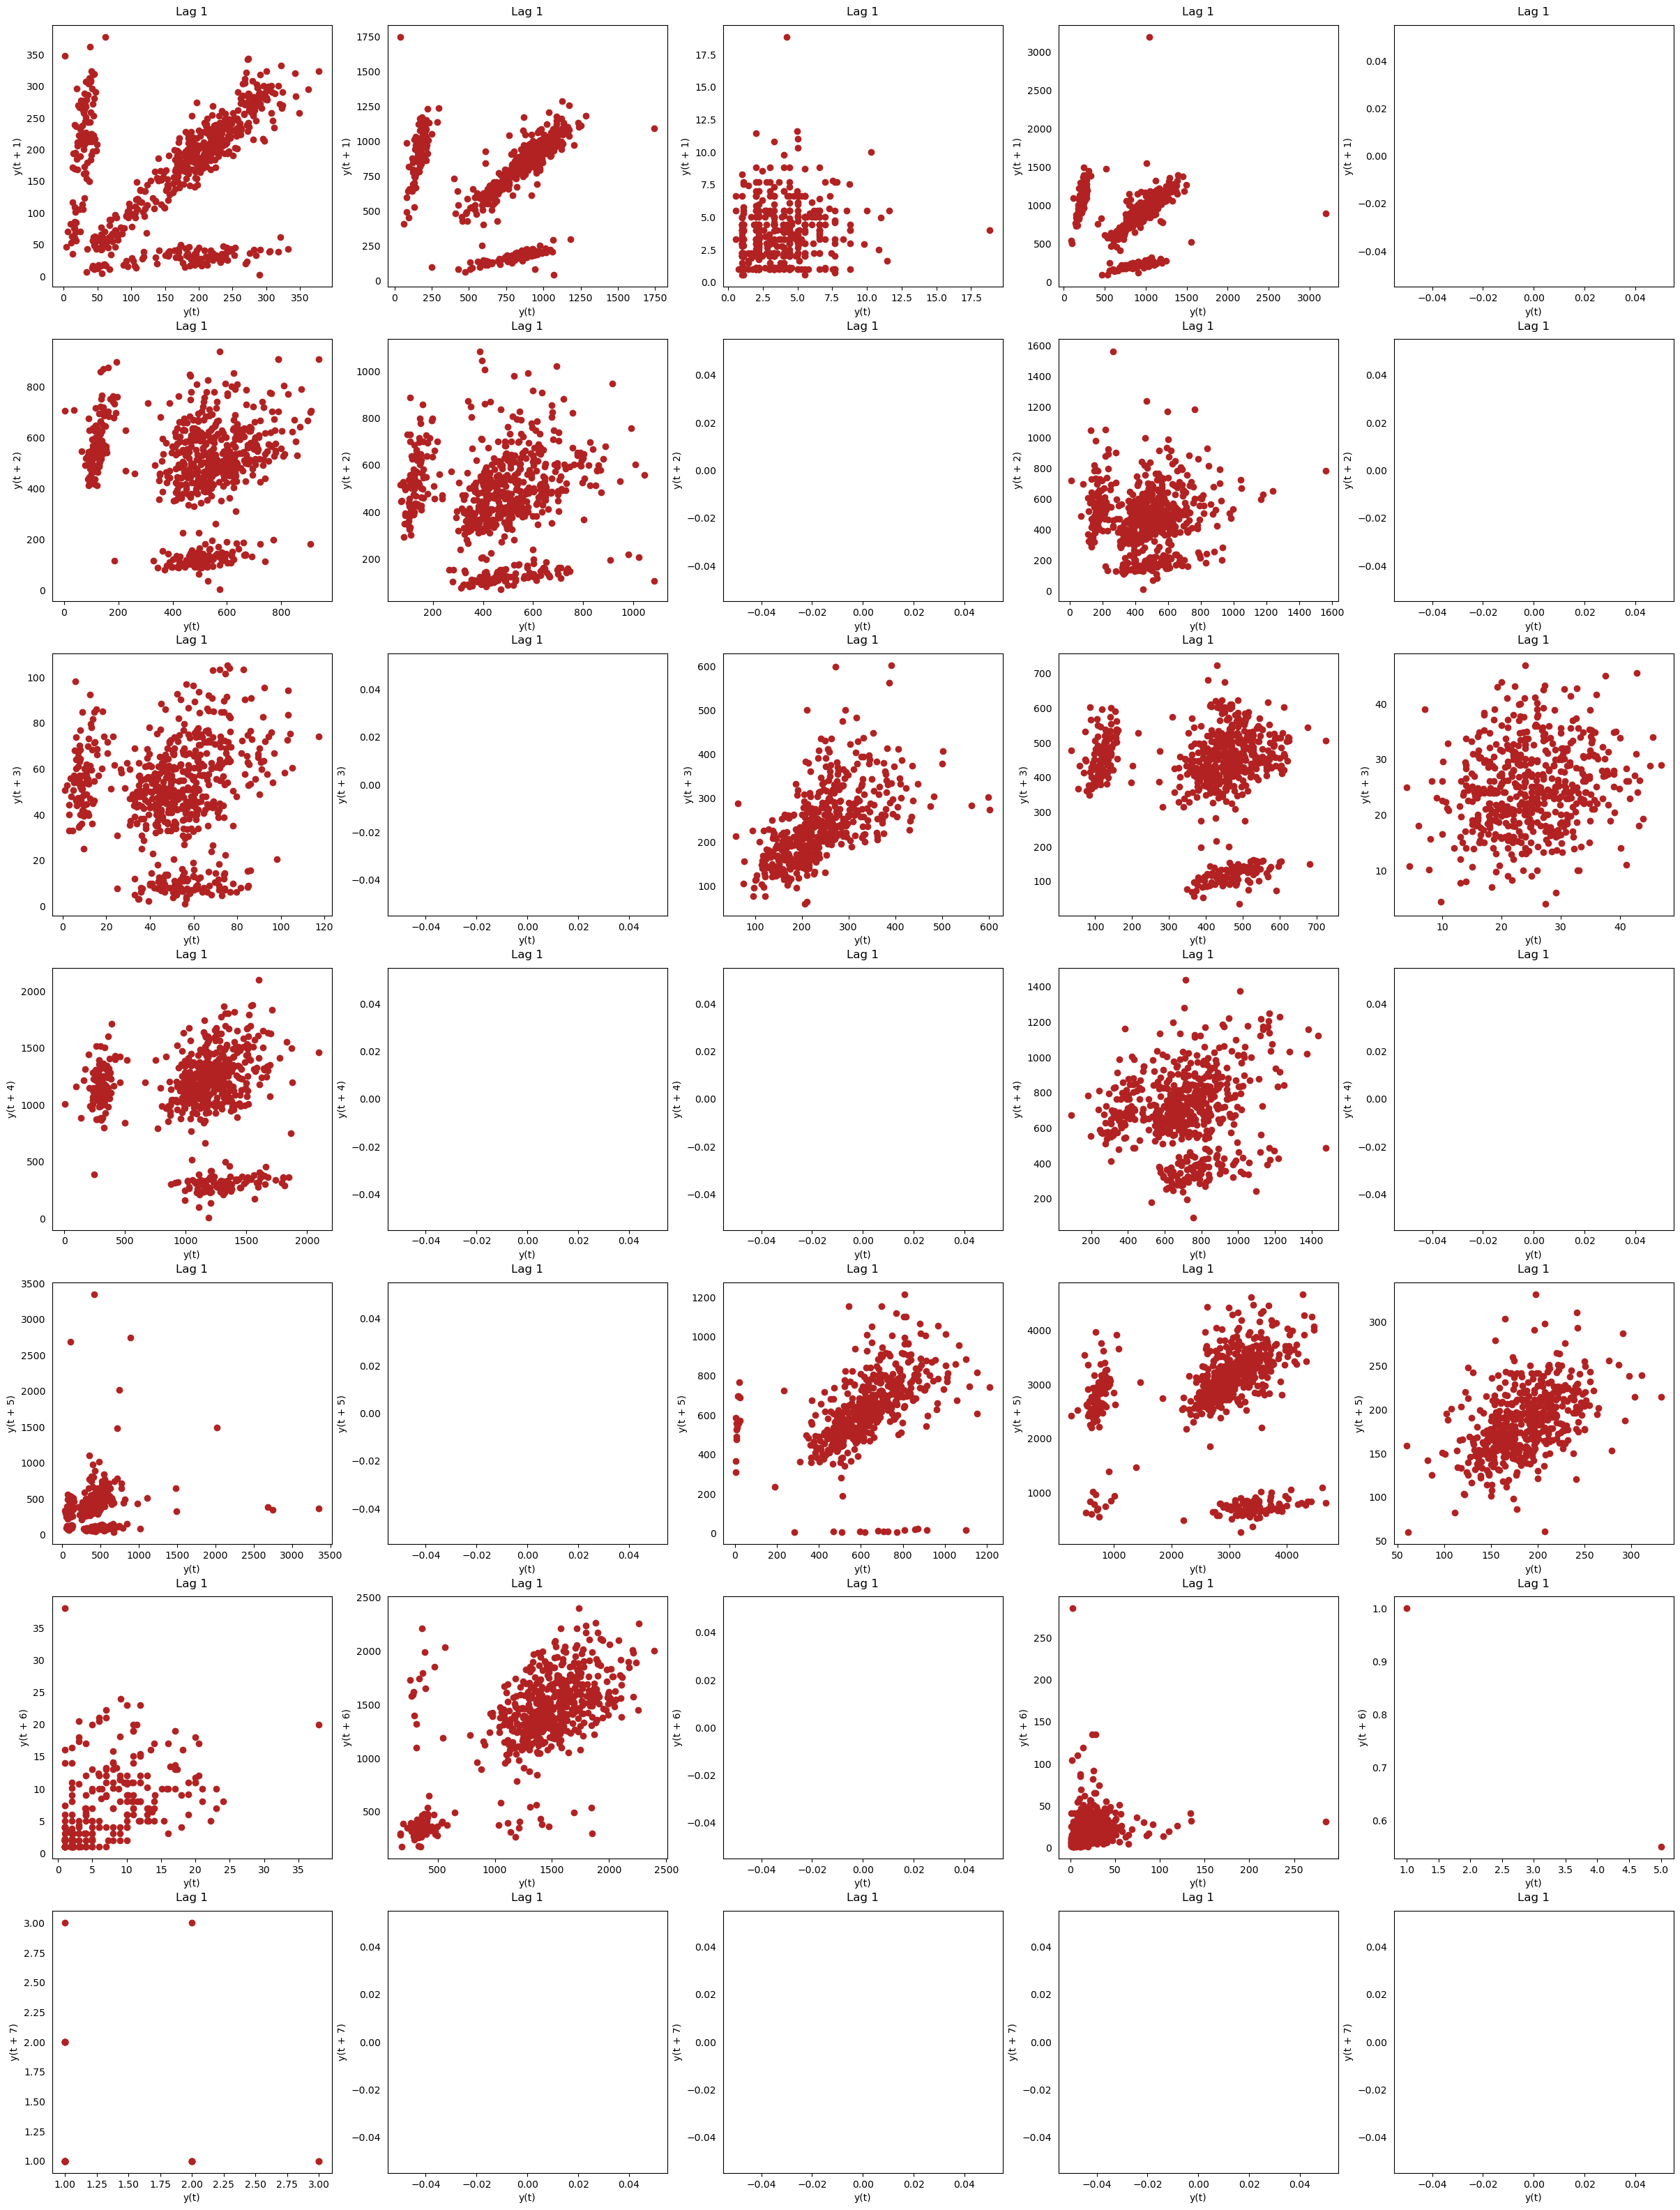

In [147]:
liste_famille = df_day.Famille.unique()
liste_entite = df_day.Entite.unique()
df_test = pd.DataFrame(columns=["Entite",'Famille','ADF','KPSS'])

lag = 1
print(f'lag : {lag}')

fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))
for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        ax = axs[i][j]
        df = df_day[(df_day["Entite"] == entite)& (df_day["Famille"] == famille)]

        lag_plot(df.Nombre_entrants_corrige, lag=i+1, ax=ax, c='firebrick')
        ax.set_title('Lag ' + str(lag))
plt.show()

lag : 2


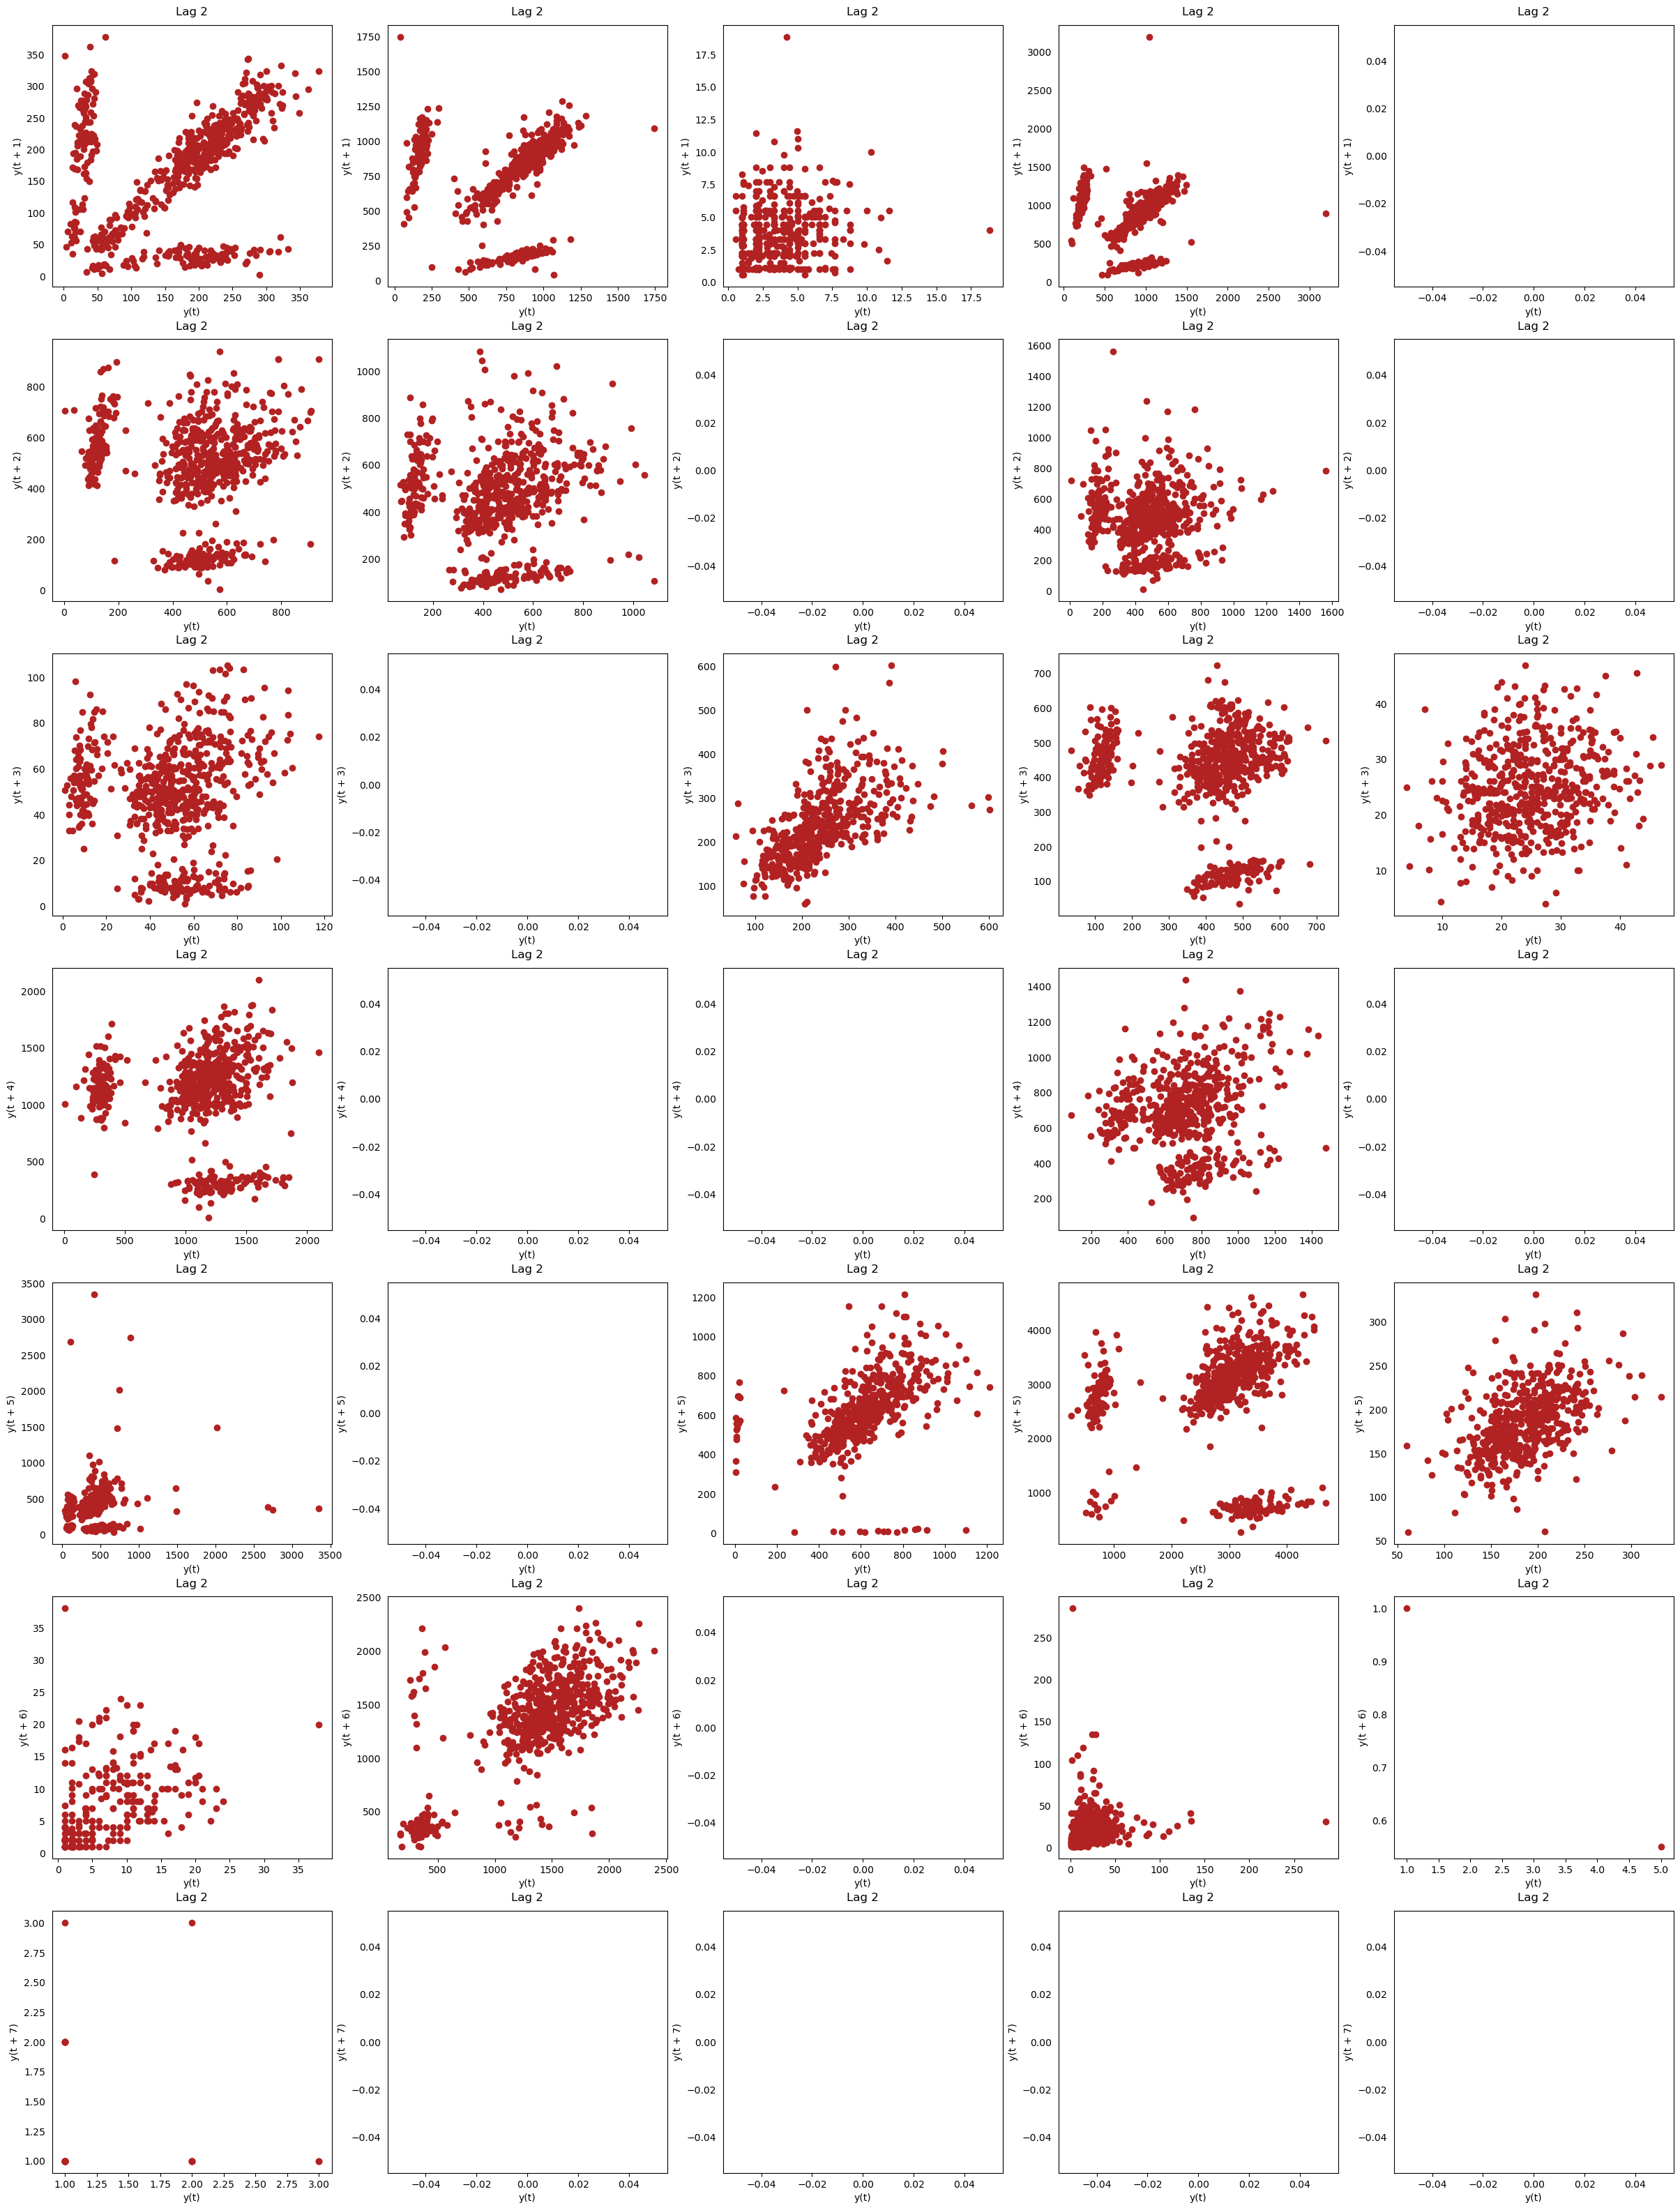

In [148]:
liste_famille = df_day.Famille.unique()
liste_entite = df_day.Entite.unique()
df_test = pd.DataFrame(columns=["Entite",'Famille','ADF','KPSS'])

lag = 2
print(f'lag : {lag}')

fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))
for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        ax = axs[i][j]
        df = df_day[(df_day["Entite"] == entite)& (df_day["Famille"] == famille)]

        lag_plot(df.Nombre_entrants_corrige, lag=i+1, ax=ax, c='firebrick')
        ax.set_title('Lag ' + str(lag))
plt.show()

lag : 3


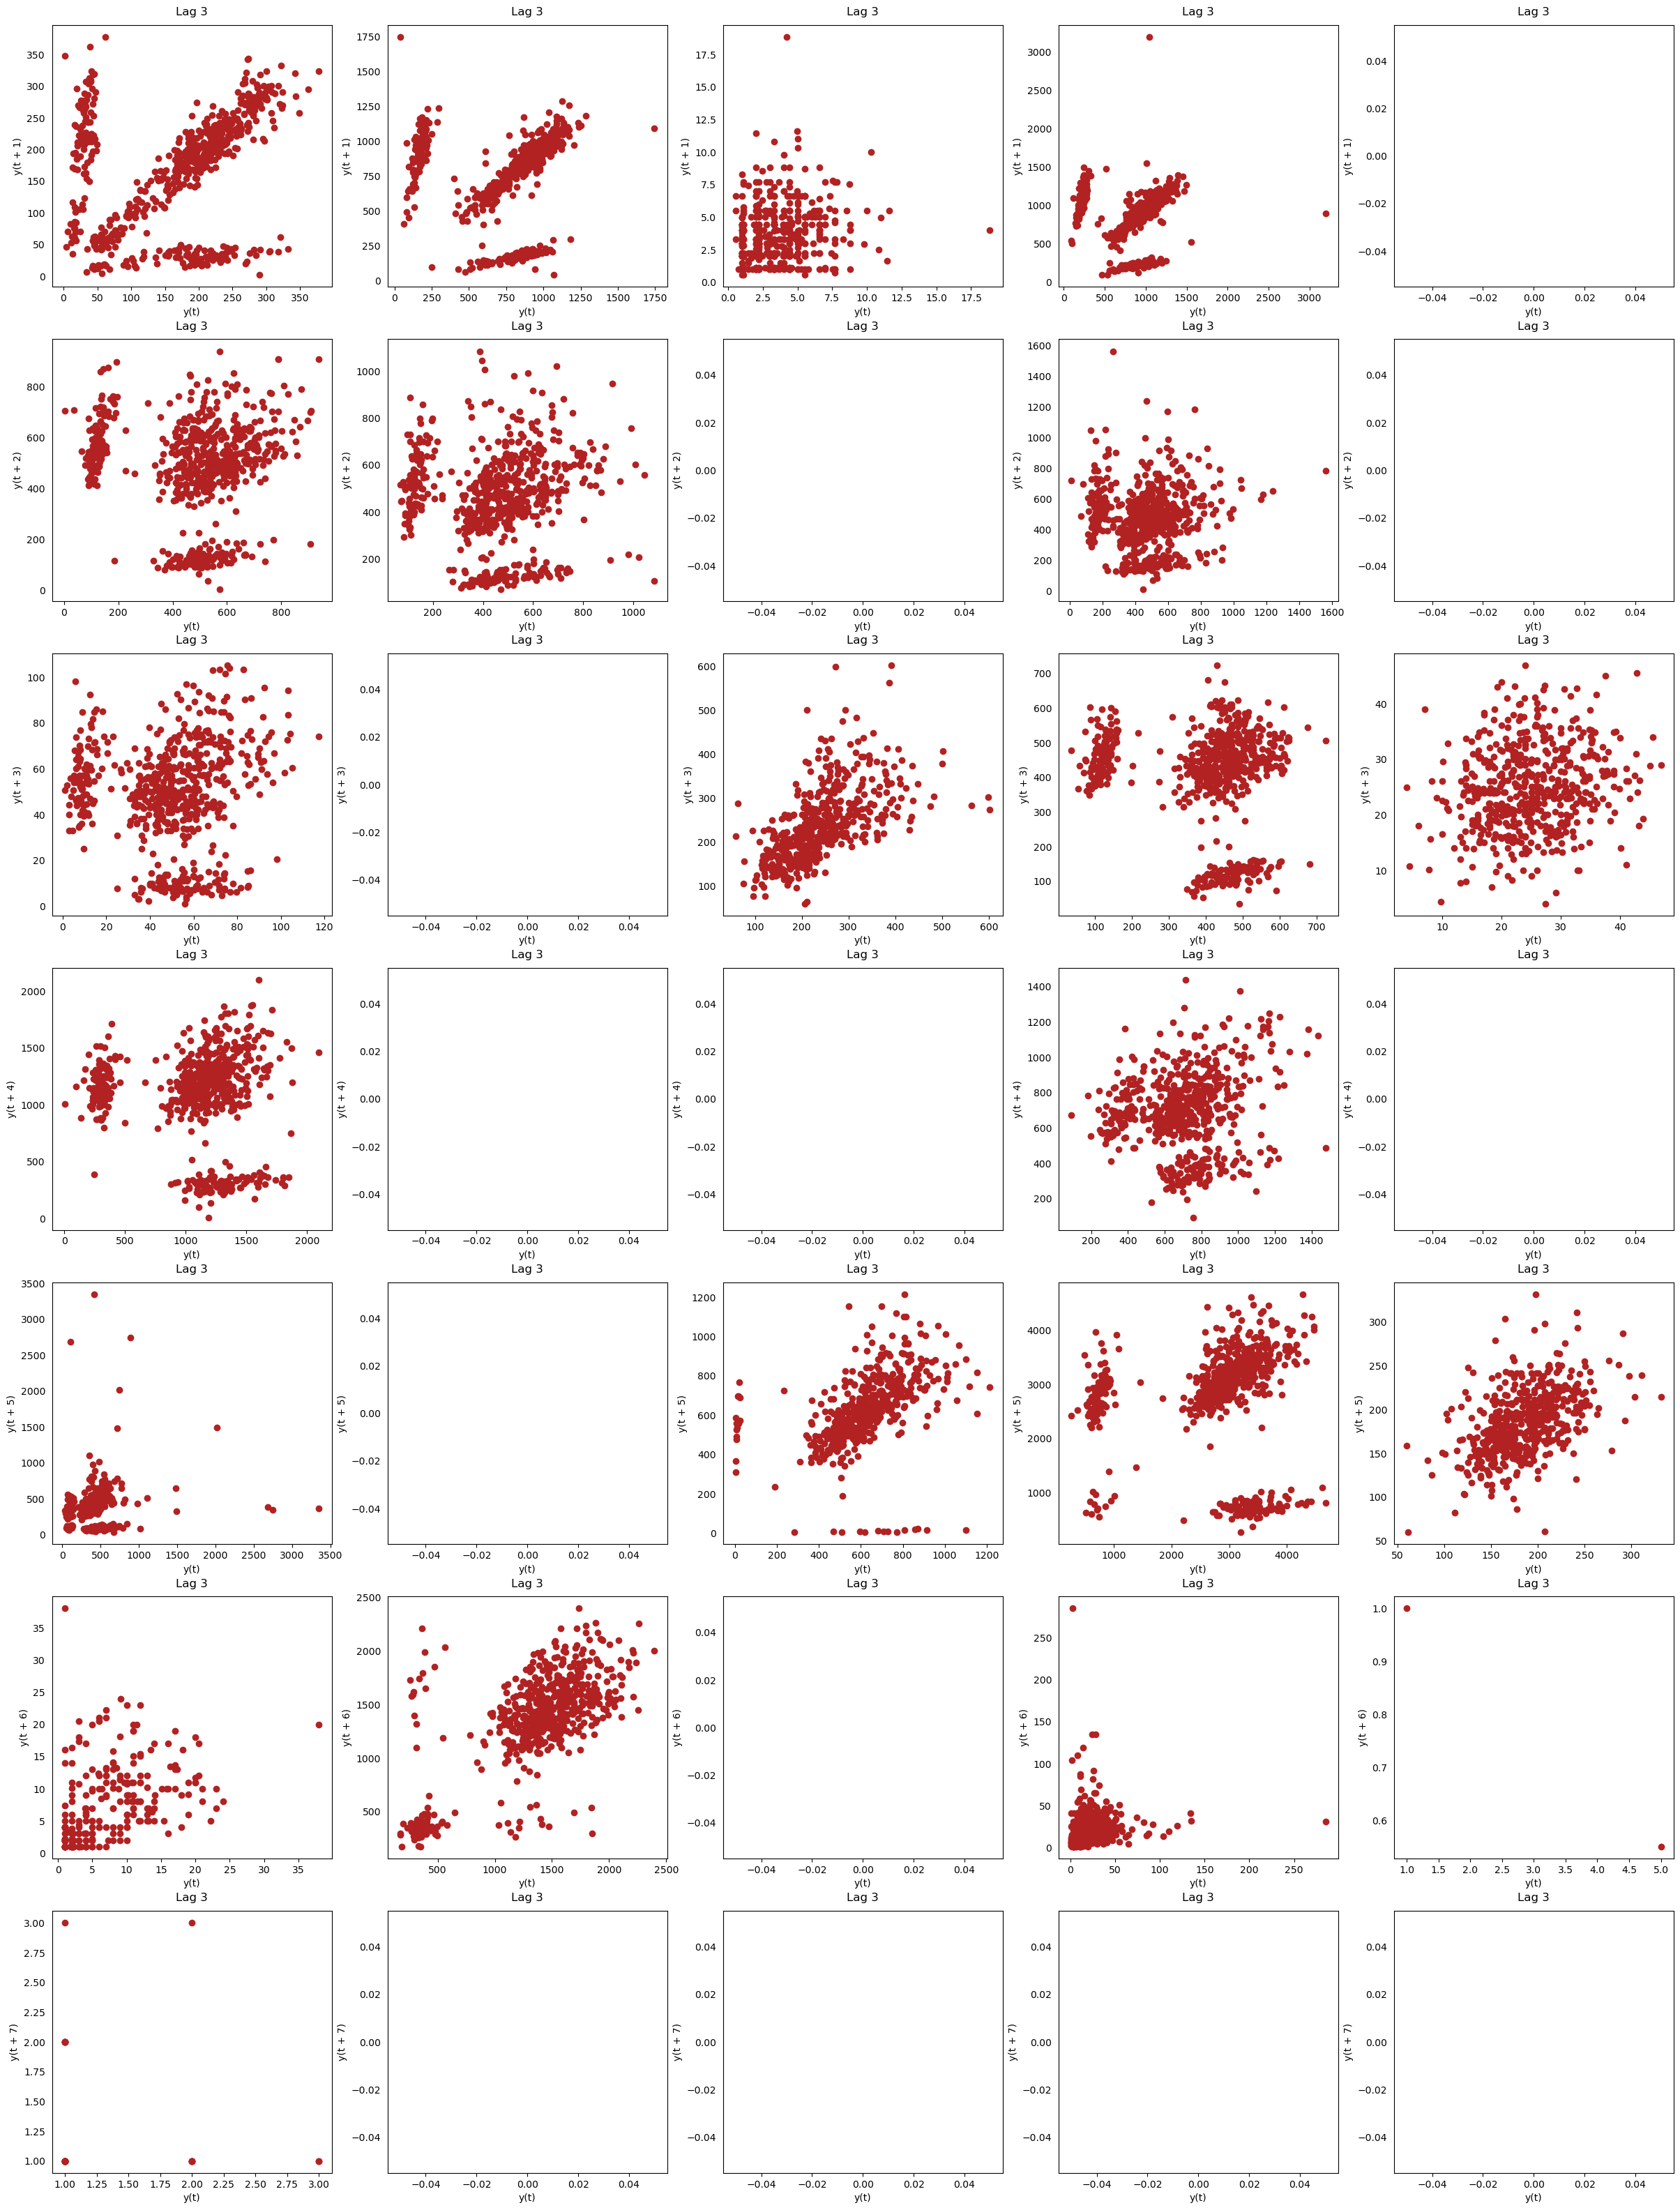

In [149]:
liste_famille = df_day.Famille.unique()
liste_entite = df_day.Entite.unique()
df_test = pd.DataFrame(columns=["Entite",'Famille','ADF','KPSS'])

lag = 3
print(f'lag : {lag}')

fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))
for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        ax = axs[i][j]
        df = df_day[(df_day["Entite"] == entite)& (df_day["Famille"] == famille)]

        lag_plot(df.Nombre_entrants_corrige, lag=i+1, ax=ax, c='firebrick')
        ax.set_title('Lag ' + str(lag))
plt.show()

## Forecastability

The ApEn algorithm compares the similarity between subsequences of a given length within the time series. It measures the logarithmic likelihood that two sequences similar within a tolerance will also remain similar for longer matches.




In [150]:
df.columns

Index(['level_0', 'index', 'date_appel', 'Entite', 'Famille',
       'Nombre_entrants_corrige', 'month', 'day_of_week'],
      dtype='object')

In [160]:
df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)

df_tel = df_tel.loc[ "2021-01-01":,:]

df = df_tel[(df_tel["Entite"] == 'Entite 1') & (df_tel["Famille"] == 'F2')]

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(df.Nombre_entrants_corrige, m=2, r=0.2*np.std(df.Nombre_entrants_corrige)))     # 0.651


1.030589788760555


In [161]:
df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)

df_tel = df_tel.loc[ "2021-01-01":,:]

liste_famille = df_day.Famille.unique()
liste_entite = df_day.Entite.unique()
df_forecastability = pd.DataFrame(columns=["Entite",'Famille','ApEn'])

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        row_dict = {}
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        row_dict['Entite'] = entite
        row_dict['Famille'] = famille
        try:
            row_dict['ApEn'] = ApEn(df.Nombre_entrants_corrige, m=2, r=0.2*np.std(df.Nombre_entrants_corrige))

        except :
            row_dict['ApEn'] = "empty"

        df_forecastability = df_forecastability.append(row_dict, ignore_index=True)

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_26494/2779788586.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecastability = df_forecastability.append(row_dict, ignore_index=True)
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_26494/2779788586.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecastability = df_forecastability.append(row_dict, ignore_index=True)
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_26494/2779788586.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecastability = df_forecastability.append(row_dict, ignore_index=True)
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_26494/2779788586.py:21: FutureWarning: The frame.append met

In [167]:
df_forecastability.sort_values('ApEn', ascending=False)

Entite Famille      ApEn
24  Entite 4      F7  1.405285
28  Entite 5      F1  1.382815
2   Entite 3      F2  1.377564
14  Entite 4      F5  1.365348
10  Entite 1      F5  1.365338
6   Entite 2      F3  1.300726
8   Entite 5      F3  1.282724
5   Entite 1      F3  1.277068
12  Entite 3      F5  1.259910
18  Entite 5      F6  1.231757
22  Entite 3      F7  1.212698
26  Entite 2      F1  1.179919
13  Entite 5      F5  1.167509
15  Entite 1      F6  1.105922
0   Entite 1      F2  1.030590
23  Entite 5      F7  1.002225
3   Entite 5      F2  0.991014
20  Entite 1      F7  0.968027
1   Entite 2      F2  0.960026
25  Entite 1      F1  0.890815
30  Entite 1      F4  0.480276
29  Entite 4      F1  0.010884
31  Entite 2      F4  0.000000
32  Entite 3      F4  0.000000
27  Entite 3      F1  0.000000
33  Entite 5      F4  0.000000
17  Entite 3      F6  0.000000
21  Entite 2      F7  0.000000
19  Entite 4      F6  0.000000
16  Entite 2      F6  0.000000
11  Entite 2      F5  0.000000
9   Entite 4      F3  0.000000
7   Entite 3      F3  0.000000
4   Entite 4      F2  0.000000
34  Entite 4      F4  0.000000

In [169]:
df_forecastability.to_csv("data/df_forecastability.csv",index=False)

## Bi-variation

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. 

If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

In [178]:
from statsmodels.tsa.stattools import grangercausalitytests

df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)

df_tel = df_tel.loc[ "2021-01-01":,:]

df = df_tel[(df_tel["Entite"] == 'Entite 1') & (df_tel["Famille"].isin(['F2','F3']))]



In [182]:
df.columns

Index(['date_appel', 'Entite', 'Famille', 'Nombre_entrants_corrige'], dtype='object')

In [ ]:
grangercausalitytests(df[['value', 'month']], maxlag=2)

In [181]:
df =df.reset_index()

In [184]:
df_pivot = df.pivot(index= 'date_appel', columns=['Entite', 'Famille'], values='Nombre_entrants_corrige')

In [187]:
df_pivot

Entite        Entite 1            
Famille             F2          F3
date_appel                        
2021-01-02   13.200000   79.056749
2021-01-04  171.637875  512.572139
2021-01-05  139.823805  519.466848
2021-01-06  186.613478  611.546888
2021-01-07  143.625028  535.223214
...                ...         ...
2023-02-10   62.526316  480.565739
2023-02-11   16.170000  155.369939
2023-02-13   75.822353  637.000000
2023-02-14   65.276712  564.338349
2023-02-15   59.216667  653.000000

[647 rows x 2 columns]

In [189]:
# Flatten the column names
df_pivot.columns = [str(col) for col in df_pivot.columns]

# Print the resulting DataFrame
print(df_pivot)

            ('Entite 1', 'F2')  ('Entite 1', 'F3')
date_appel                                        
2021-01-02           13.200000           79.056749
2021-01-04          171.637875          512.572139
2021-01-05          139.823805          519.466848
2021-01-06          186.613478          611.546888
2021-01-07          143.625028          535.223214
...                        ...                 ...
2023-02-10           62.526316          480.565739
2023-02-11           16.170000          155.369939
2023-02-13           75.822353          637.000000
2023-02-14           65.276712          564.338349
2023-02-15           59.216667          653.000000

[647 rows x 2 columns]


In [193]:
from statsmodels.tsa.stattools import grangercausalitytests

truc = grangercausalitytests(df_pivot, maxlag=8)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=56.1803 , p=0.0000  , df_denom=643, df_num=1
ssr based chi2 test:   chi2=56.4424 , p=0.0000  , df=1
likelihood ratio test: chi2=54.1115 , p=0.0000  , df=1
parameter F test:         F=56.1803 , p=0.0000  , df_denom=643, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=27.5294 , p=0.0000  , df_denom=640, df_num=2
ssr based chi2 test:   chi2=55.4889 , p=0.0000  , df=2
likelihood ratio test: chi2=53.2307 , p=0.0000  , df=2
parameter F test:         F=27.5294 , p=0.0000  , df_denom=640, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.4983 , p=0.0000  , df_denom=637, df_num=3
ssr based chi2 test:   chi2=65.2036 , p=0.0000  , df=3
likelihood ratio test: chi2=62.1099 , p=0.0000  , df=3
parameter F test:         F=21.4983 , p=0.0000  , df_denom=637, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=26.7888 , p=0.0000  

In [192]:
truc

{1: ({'ssr_ftest': (56.180328158802624, 2.1987495897705124e-13, 643.0, 1),
   'ssr_chi2test': (56.44244477540668, 5.78676453874438e-14, 1),
   'lrtest': (54.11152134064196, 1.8942728921728424e-13, 1),
   'params_ftest': (56.18032815880315, 2.1987495897699813e-13, 643.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (27.529371617008916, 3.3939718303265025e-12, 640.0, 2),
   'ssr_chi2test': (55.48888966553359, 8.927722973072382e-13, 2),
   'lrtest': (53.23068143938235, 2.7612414967028073e-12, 2),
   'params_ftest': (27.529371617009765, 3.393971830323874e-12, 640.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}